\***\*============================GRAPH PREPROCESSING============================**


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pickle

# Define the Edge class
class Edge:
    def __init__(self, u, v, weight):
        self.u = u
        self.v = v
        self.weight = weight


In [2]:
# from random import randint
# G = nx.Graph()

# # Read the file and create edges with random weights
# file_path = 'small_dataset.txt'  # Replace with the actual file path
# # edges = []
# with open(file_path, 'r') as file:
#     file_contents = file.readlines()
#     num_lines = len(file_contents)
#     print(f"Number of lines: {num_lines}")
#     for i, line in enumerate(file_contents):
#         node1, node2 = map(int, line.split())
#         weight = float(randint(1, 99)) + ((i+1) * (1 / (num_lines -1)))
#     # Ensure the weight is displayed with full precision
#         # print(f"Weight: {weight:.50f}")
#         # edges.append(Edge(node1, node2, weight))
#         G.add_edge(node1, node2, weight=weight)
        
        

# # Create a NetworkX graph and add edges
# # for edge in edges:
# #     G.add_edge(edge.u, edge.v, weight=edge.weight)
#     # print(f"Edge: {edge.u} - {edge.v}, Weight: {edge.weight:.1000f}")

# # Preprocess the graph
# D = dict(nx.all_pairs_dijkstra_path_length(G, weight='weight'))
# with open('D.pkl', 'wb') as f:
#     pickle.dump(D, f)

# # # Create a new figure with a larger size
# # plt.figure(figsize=(60, 60))

# # # Draw the graph using the spring_layout
# # pos = nx.spring_layout(G)
# # nx.draw(G, pos, with_labels=True, node_color="yellow", node_size=300, edge_color="gray")

# # # Draw edge labels
# # edge_labels = nx.get_edge_attributes(G, "weight")
# # nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6)

# # plt.show()

# with open('graph.pkl', 'wb') as f:
#     pickle.dump(G, f)

In [3]:
# Load G and D from the local files
with open('graph.pkl', 'rb') as f:
    G = pickle.load(f)
    

with open('D.pkl', 'rb') as f:
    D = pickle.load(f)
# with open('shortest_paths.pkl', 'rb') as f:
#     shortest_paths = pickle.load(f) 

In [4]:
import networkx as nx
import plotly.graph_objects as go

def create_interactive_graph(G):
    # Create a spring layout for node positions
    pos = nx.spring_layout(G)
    
    # Create edge traces
    edge_x = []
    edge_y = []
    edge_text = []
    edge_weights = []
    
    for edge in G.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_x.extend([x0, x1, None])
        edge_y.extend([y0, y1, None])
        weight = G.edges[edge]['weight']
        edge_weights.append(weight)
        edge_text.append(f"Weight: {int(weight)}")
    
    edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        line=dict(width=2, color='#888'),
        hoverinfo='text',
        text=edge_text,
        mode='lines+text',
        textposition='middle center',
        textfont=dict(size=10)
    )
    
    # Add edge weight annotations
    annotations = []
    for edge in G.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        weight = G.edges[edge]['weight']
        annotations.append(dict(
            x=(x0 + x1) / 2,
            y=(y0 + y1) / 2,
            xref='x',
            yref='y',
            text=str(int(weight)),
            showarrow=False,
            font=dict(size=10)
        ))
    
    # Create node traces
    node_x = []
    node_y = []
    node_text = []
    
    for node in G.nodes():
        x, y = pos[node]
        node_x.append(x)
        node_y.append(y)
        node_text.append(f"Node: {node}")
    
    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode='markers+text',
        hoverinfo='text',
        text=[str(node) for node in G.nodes()],
        textposition='middle center',
        marker=dict(
            showscale=False,
            color='yellow',
            size=40,
            line_width=2,
            line=dict(color='black', width=1)
        ),
        textfont=dict(size=12)
    )
    
    # Create the figure with larger size
    fig = go.Figure(
        data=[edge_trace, node_trace],
        layout=go.Layout(
            title='Interactive Graph Visualization',
            showlegend=False,
            hovermode='closest',
            margin=dict(b=20, l=20, r=20, t=40),
            xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
            yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
            plot_bgcolor='white',
            width=1200,  # Increased width
            height=800,  # Increased height
            annotations=annotations
        )
    )
    
    return fig

# Create and display the interactive graph
fig = create_interactive_graph(G)
fig.show(figsize=(40, 40))

In [5]:
# open in browser

# fig.show(renderer="browser")


=================================== Distance Oracle =====================================


\*\*---------------------------------SHORTEST PATH function and Store-------------------------------


In [6]:
# import networkx as nx

# def store_shortest_paths(G):
#     # Use NetworkX's built-in function to compute all pairs shortest paths
#     all_pairs_paths = dict(nx.all_pairs_dijkstra_path(G, weight='weight'))
    
#     # Flatten the dictionary to match the desired output format
#     shortest_paths = {}
#     for u, paths in all_pairs_paths.items():
#         for v, path in paths.items():
#             shortest_paths[(u, v)] = path
    
#     return shortest_paths

# # Example usage
# shortest_paths = store_shortest_paths(G)



In [7]:
# with open('shortest_paths.pkl', 'wb') as f:
#     pickle.dump(shortest_paths, f)

In [8]:
with open('shortest_paths.pkl', 'rb') as f:
    shortest_paths = pickle.load(f)

In [9]:
with open('txu_dict.pkl', 'rb') as f:
    txu_dict = pickle.load(f)  

---------------------------------POWER_OF_2 FUNCTION--------------------------------


In [10]:
import math

def nearest_power_of_2(x):
    if x <= 0:
        return 0 # Return 1 for non-positive input
    elif math.isinf(x):
        return float("inf")  # Return infinity for infinite input
    else:
        return 2 ** math.floor(math.log2(x))

In [11]:
from math import isclose

def single_edge_in_path(p, F):
    if not p or len(p) < 2 or not F:
        return False

    s, t = p[0], p[-1]
    p_dist = D[s][t]

    def edge_on_path(u, v):
        if G.has_edge(u, v):
            wt = G[u][v]["weight"]
        elif G.has_edge(v, u):
            wt = G[v][u]["weight"]
            u, v = v, u
        else:
            return False

        return (
            isclose(D[s][u] + wt + D[v][t], p_dist) or
            isclose(D[s][v] + wt + D[u][t], p_dist)
        )

    if isinstance(F, Edge) or isinstance(F, tuple):
        u, v = (F.u, F.v) if isinstance(F, Edge) else F
        return edge_on_path(u, v)

    for edge in F:
        u, v = (edge.u, edge.v) if isinstance(edge, Edge) else edge
        if edge_on_path(u, v):
            return True

    return False


--------------------------------FIND_JUMP FUNCTION--------------------------------


In [12]:
def FINDJUMP(P, F):
    X = []  # Initialie X
    if not P:
        return[]
    x = P[0]
    X.append(x)
    vertices = F
   
    while True:
        u = min(vertices, key=lambda v: nearest_power_of_2(D[x][v]))
        
        distance= max(1, nearest_power_of_2(D[x][u]))

        y = None
        for vertex in P[P.index(x) + 1:]:
            if D[x][vertex] >= distance:
                y = vertex
                break  
        if y is not None:
            X.append(y)
            x = y
        else:
            break
    return X 

**------------------------------MAXIMIZER FUNCTION--------------------------------
**


In [13]:
def get_edge_weight(G, u, v):
    if G.has_edge(u, v):
        return G[u][v].get('weight', float('inf'))  # Provide a default value if 'weight' is missing
    else:
        return float('inf')

In [14]:

def maximizer(G, x, y, d1, d2):
    G = G.copy()
    max_edges = set()
    edges_set = set()
    max_xy_edge = None
    max_xy_path = None
    max_xy_path_new = None

    # Cache distance calculations
    # distance_cache = {}

    # def get_distance_cached(node1, node2):
    #     if (node1, node2) not in distance_cache:
    #         distance_cache[(node1, node2)] = distance_oracle.get_distance(node1, node2)
    #     return distance_cache[(node1, node2)]

    if nx.has_path(G, x, y):
        path = shortest_paths[(x, y)]
        for i in range(len(path) - 1):
            u = path[i]
            v = path[i + 1]
            edges_set.add((u, v))

    for u, v in edges_set:
        # if get_distance_cached(x, u) >= d1 and get_distance_cached(y, v) >= d2:
        #     max_edges.add((u, v))
        if (D[x][u] >= d1 and D[y][v] >= d2) :
        
            max_edges.add((u, v))   

    max_xy_distance = float('-inf')
    for u, v in max_edges:
        edge_data = G.get_edge_data(u, v)
        if G.has_edge(u, v):
            G.remove_edge(u, v)
        # D = preprocess_graph(G)
        # distance_oracle_new = DistanceOracle(D)
        if nx.has_path(G, x, y):
            xy_path = nx.dijkstra_path(G, x, y, weight='weight')
            max_uv_distance = sum(
                get_edge_weight(G, xy_path[i], xy_path[i + 1])
                for i in range(len(xy_path) - 1)
            )
            if max_uv_distance > max_xy_distance:
                max_xy_edge = (u, v)
                max_xy_path = xy_path
                max_xy_distance = max_uv_distance
        G.add_edge(u, v, **edge_data)   

    if max_xy_path is not None:
        s = 0
        max_xy_path_new = []
        f = 1
        i_edge = 0
        i_end = None
        for i in range(len(max_xy_path) - 1):
            u = max_xy_path[s]
            v = max_xy_path[i + 1]
            uv_distance = round(D[u][v] , 7)
            
            
            uv_distance_path = sum(
                get_edge_weight(G, max_xy_path[j], max_xy_path[j + 1])
                for j in range(s, i + 1)
            )
            
            uv_distance_path = round(uv_distance_path, 7)
            if uv_distance < uv_distance_path:
                if i < (len(max_xy_path) - 2):
                    s_to_a_path = [u]
                    intermediate_edge = (v, max_xy_path[i + 2])
                    i_end = max_xy_path[i + 2]
                    s_to_a_path.append(max_xy_path[i])
                    max_xy_path_new.append(s_to_a_path)
                    max_xy_path_new.append(intermediate_edge)
                    s = i + 2
                    i_edge+=1
                    if i_edge == f:
                        break
                    
                    
        max_xy_path_new.append([i_end, max_xy_path[-1]])

        if len(max_xy_path_new) == 1:
            max_xy_path_new = [max_xy_path]

    return max_xy_edge, max_xy_path_new
    # return max_xy_edge, max_xy_path


==============================MAXIMIZER Storage=========================================


In [15]:
def find_max_distance(G, distance_oracle):
    max_distance = float("-inf")
    for key1, value1 in D.items():
        for key2, value2 in value1.items():
            if value2 > max_distance:
                max_distance = value2
    return max_distance

In [16]:
max_d_value = int(find_max_distance(G, D))
d1_d2_list = [0]
i = nearest_power_of_2((max_d_value))


while i >= 1:
    d1_d2_list.append(i)
    i //= 2
# print(max_d_value)

In [17]:
# import networkx as nx
# from concurrent.futures import ThreadPoolExecutor, as_completed
# import tqdm # Import tqdm to display a progress bar


# # Initialize a dictionary to store the maximizer output
# maximizer_dict = {}

# # Store the maximizer function reference directly
# maximizer_function = maximizer  # Replace 'maximizer' with the actual function name

# # Collect errors to print after the loop
# errors = []

# # Define a function to process a single pair of nodes
# def process_pair(G, x, y, d1, d2):
#     try:
#         result = maximizer_function(G, x, y, d1, d2)
#         if result is not None:
#             max_edge, max_path = result
#             return (x, y, d1, d2), (max_edge, max_path)
#     except nx.NetworkXNoPath:
#         return (x, y, d1, d2), None

# # Use ThreadPoolExecutor to parallelize the computation
# nodes = list(G.nodes)

# with ThreadPoolExecutor() as executor:
#     futures = []
#     for x in nodes:
#         for y in nodes:
#             if x != y:
#                 for d1 in d1_d2_list:
#                     for d2 in d1_d2_list:
#                         futures.append(executor.submit(process_pair, G, x, y, d1, d2))

#     for future in tqdm.tqdm(as_completed(futures), total=len(futures)):
#         key, result = future.result()
#         if result is not None:
#             maximizer_dict[key] = result
#         else:
#             errors.append(f"No path between {key[0]} and {key[1]} for d1: {key[2]}, d2: {key[3]}.")

# # Print all errors after the loop
# for error in errors:
#     print(error)

# with open('maximizer_dict.pkl', 'wb') as f:
#     pickle.dump(maximizer_dict, f)
    

In [18]:
# load maximizer_dict from the local file   
with open('maximizer_dict.pkl', 'rb') as f:
    maximizer_dict = pickle.load(f)

===============================MAIN: QUERY FUNCTION====================================


### Stable Version 


In [19]:
# from numpy import short


# def is_valid_path(G, path):
#     return all(G.has_edge(path[i], path[i + 1]) for i in range(len(path) - 1)) and (
#         len(path) < 2 or G.has_edge(path[-2], path[-1])
#     )
# def remove_duplicates(lst):
#     seen = set()
#     result = []
#     for item in lst:
#         if item not in seen:
#             seen.add(item)
#             result.append(item)
#     return result
# def QUERY(G, s, t, e):
#     if e == []:
#         try:
#             return shortest_paths[(s, t)]
#         except KeyError:
#             print(f"Shortest path for ({s}, {t}) not found in shortest_paths.")
#             return []
#         # return shortest_paths[(s, t)]
#     # Check if the edge e is in the graph
#     if isinstance(e, list):
#         e.u, e.v = e
#     if not (G.has_edge(e.u, e.v) or G.has_edge(e.v, e.u)):
#         # print("The edge to avoid is not in the graph.")
#         return shortest_paths[(s, t)]

#     # Check if there is a valid path between s and t
#     if shortest_paths[(s, t)] is None and shortest_paths[(t, s)] is None:
#         print("There is no valid path between the source and destination vertices.")
#         return [], float("inf")
#     # print(f"shortest_paths[(s,t)]={shortest_paths[(s, t)]}")
#     JUMP_st = FINDJUMP(shortest_paths[(s, t)], [e.u, e.v])
#     JUMP_ts = FINDJUMP(shortest_paths[(t, s)], [e.u, e.v])
#     # print(f"JUMP_st={JUMP_st}, JUMP_ts={JUMP_ts}")
#     final_shortest_path = []
#     shortest_path_distance = float("inf")
#     for x in JUMP_st:
#         for y in JUMP_ts:
#             if x == y:
#                 continue
#             # print(f"x={x}, y={y}")
#             vertices = [e.u, e.v]

#             d1 = min(nearest_power_of_2(D[x][a]) for a in vertices   )

#             d2 = min(nearest_power_of_2(D[y][a]) for a in vertices) 
#             # print(f"d1={d1}, d2={d2}")
#             e_star, xy_e_star = maximizer_dict[(x, y, d1, d2)]
#             # e_star, xy_e_star = maximizer(G , x, y, d1, d2)
            

#             if xy_e_star is None:
#                 xy_e_star = []
#             elif len(xy_e_star)> 2:
#                 # Flatten the list of lists
#                 xy_e_star = shortest_paths[(xy_e_star[0][0], xy_e_star[0][1])] + [xy_e_star[1][0]] + shortest_paths[(
#                     # print(f"xy_e_star={xy_e_star}")
#                     xy_e_star[2][0], xy_e_star[2][1])]
#             else: 
#                 xy_e_star = xy_e_star[0]
#             sx_path = shortest_paths[(s, x)]
#             yt_path = shortest_paths[(y, t)]
#             # print(f"sx_path={sx_path}, yt_path={yt_path}")
#             # if sx_path is None or yt_path is None:
#             #     continue  # Skip if there is no valid path from s to x or y to t
#             if sx_path is None:
#                 sx_path = [x]
#             if yt_path is None:
#                 yt_path = [y]
            
#             p_distance = float("inf")
#             P = sx_path + xy_e_star[1:-1] + yt_path
#             # P = remove_duplicates(sx_path + xy_e_star + yt_path)
            
#             # if y==s and xy_e_star != []:
#             #     P = xy_e_star[::-1] + shortest_paths[(x, t)]
#             #     if x==t:
#             #         P = xy_e_star[::-1] 
#             # elif xy_e_star != [] and D[s][y] < D[x][s]:
#             #     P = shortest_paths[(s, y)] + xy_e_star[::-1] + shortest_paths[(x, t)]
#             #     if s in xy_e_star and xy_e_star.index(s) > 0:
#             #         s_index  = xy_e_star[::-1].index(s) 
#             #         p1 = xy_e_star[::-1][s_index:]    
#             #         p2 = shortest_paths[(x, t)]
#             #         P = p1 + p2
#             P = remove_duplicates(P)
            
#             # print(f"P={P}")
#             if not is_valid_path(G, P):
#                 continue
            
#             if is_valid_path(G, P):
#                 p_distance = sum(
#                     get_edge_weight(G, P[i], P[i + 1]) for i in range(len(P) - 1)
#                 )

#             p_edges = [(P[i], P[i+1]) for i in range(len(P) - 1)]
#             if ((e.u , e.v) not in p_edges and (e.v , e.u) not in p_edges ) and (p_distance < shortest_path_distance):
#                     final_shortest_path = P
#                     # print(f"shortest_path1={final_shortest_path}")
#                     shortest_path_distance = p_distance
#     return final_shortest_path

### BETA Version

In [20]:



from math import isclose


def is_valid_path(G, path):
    return all(G.has_edge(path[i], path[i + 1]) for i in range(len(path) - 1)) and (
        len(path) < 2 or G.has_edge(path[-2], path[-1])
    )
def remove_duplicates(lst):
    seen = set()
    result = []
    for item in lst:
        if item not in seen:
            seen.add(item)
            result.append(item)
    return result

def is_edge_on_shortest_path(G,  s, t, u, v):

    wt = G[v][u]['weight']


    dst = D[s][t]

    return (
        isclose(D[s][u] + wt + D[v][t], dst) or
        isclose(D[s][v] + wt + D[u][t], dst)
    )


def QUERY(G, s, t, e):
    if e == []:
        try:
            return shortest_paths[(s, t)]
        except KeyError:
            print(f"Shortest path for ({s}, {t}) not found in shortest_paths.")
            return []
        # return shortest_paths[(s, t)]
    # Check if the edge e is in the graph
    if isinstance(e, list):
        e.u, e.v = e
    if not (G.has_edge(e.u, e.v) or G.has_edge(e.v, e.u)):
        # print("The edge to avoid is not in the graph.")
        return shortest_paths[(s, t)]

    # Check if there is a valid path between s and t
    if shortest_paths[(s, t)] is None and shortest_paths[(t, s)] is None:
        print("There is no valid path between the source and destination vertices.")
        return []
    
    if not is_edge_on_shortest_path(G, s, t, e.u, e.v):
        return shortest_paths[(s, t)]
    
                                                                         
    # print(f"shortest_paths[(s,t)]={shortest_paths[(s, t)]}")
    JUMP_st = FINDJUMP(shortest_paths[(s, t)], [e.u, e.v])
    JUMP_ts = FINDJUMP(shortest_paths[(t, s)], [e.u, e.v])
    # print(f"JUMP_st={JUMP_st}, JUMP_ts={JUMP_ts}")
    final_shortest_path = []
    shortest_path_distance = float("inf")
    P = []
    p_distance = float("inf")
    for x in JUMP_st:
        for y in JUMP_ts:
            if x == y:
                continue
            # print(f"x={x}, y={y}")
            vertices = [e.u, e.v]

            d1 = min(nearest_power_of_2(D[x][a]) for a in vertices   )

            d2 = min(nearest_power_of_2(D[y][a]) for a in vertices) 
            # print(f"d1={d1}, d2={d2}")
            e_star, xy_e_star = maximizer_dict[(x, y, d1, d2)]
            # e_star, xy_e_star = maximizer(G , x, y, d1, d2)
                        

            if xy_e_star is None:
                xy_e_star = []
            elif len(xy_e_star)> 2:
                # Flatten the list of lists
                xy_e_star = shortest_paths[(xy_e_star[0][0], xy_e_star[0][1])] + [xy_e_star[1][0]] + shortest_paths[(
                    # print(f"xy_e_star={xy_e_star}")
                    xy_e_star[2][0], xy_e_star[2][1])]
            else: 
                xy_e_star = xy_e_star[0]
            sx_path = shortest_paths[(s, x)]
            yt_path = shortest_paths[(y, t)]

            

            
            if single_edge_in_path(sx_path , e) or single_edge_in_path(yt_path , e):
                continue
            
            if xy_e_star != []:
                P = sx_path + xy_e_star[1:-1] + yt_path
            else:
                P = sx_path + yt_path

            
            # if is_valid_path(G, P):
            #     p_distance = sum(
            #         get_edge_weight(G, P[i], P[i + 1]) for i in range(len(P) - 1)
            #     )
            
            p_distance = sum(get_edge_weight(G, P[i], P[i + 1]) for i in range(len(P) - 1))

            p_edges = set()
            for i in range(len(P) - 1):
                p_edges.add((P[i], P[i + 1]))
            if ((e.u , e.v) not in p_edges and (e.v , e.u) not in p_edges ) and (p_distance < shortest_path_distance):
                    final_shortest_path = P
                    # print(f"shortest_path1={final_shortest_path}")
                    shortest_path_distance = p_distance
    return final_shortest_path

In [21]:
# # G_copy = G.copy()   
def cross_check(G, s, t, e_u, e_v):
    G_copy = G.copy()
    edge_exists = G_copy.has_edge(e_u, e_v)
    if edge_exists:
        edge_data = G_copy.get_edge_data(e_u, e_v)
        G_copy.remove_edge(e_u, e_v)
        # print(f"Removed edge ({e_u}, {e_v}) from the graph.")
        
    if not nx.has_path(G_copy, s, t):
        # print("No path exists between the source and destination vertices.")
        return []

    st_path = nx.dijkstra_path(G_copy, s, t, weight='weight')
    
    
    if edge_exists:
        G_copy.add_edge(e_u, e_v, **edge_data)
        # print(f"Added edge ({e_u}, {e_v}) back to the graph.")



    return st_path

# # cross_check(G, 1, 435, 236, 122)

In [22]:
import random   
import time
import numpy as np  


    
   
print("=================Single fault Query test=====================") 

test_failed =0
test_passed =0

query_time = []
naive_query_time = []

for i in range(100):
    # print(f"Test {i+1}:")

    s = random.randint(0, 49)
    t = random.randint(0, 49)
    if s == t:
        t = (t + 1) % 50
    if (s, t) not in shortest_paths:
        continue
    e_u , e_v = random.sample(shortest_paths[(s, t)], 2)
    e = Edge(e_u, e_v, get_edge_weight(G, e_u, e_v))
    Q_time = time.time()
    
    P1 = QUERY(G , s, t, e)
    wp1 = sum(get_edge_weight(G, P1[i], P1[i + 1]) for i in range(len(P1) - 1))
    Q_time = time.time() - Q_time
    
    C_time = time.time()
    P2 = cross_check(G, s, t, e_u, e_v)
    wp2 = sum(get_edge_weight(G, P2[i], P2[i + 1]) for i in range(len(P2) - 1))
    C_time = time.time() - C_time
    # print(P1 , wp1)
    # print(f"QUERY time: {Q_time:.6f} seconds")
    # print(P2 , wp2)
    # print(f"Cross-check time: {C_time:.6f} seconds")
    
    if P1 != P2:
        test_failed +=1
        
        print("Paths dont match.")
        print(f"shortest st path: {shortest_paths[(s, t)]}")    
        print(f"Source: {s}, Destination: {t}, Edge to avoid: {e_u}-{e_v}")
        print(P1 , wp1)
        print(f"QUERY time: {Q_time:.6f} seconds")
        print(P2 , wp2)
        print(f"Cross-check time: {C_time:.6f} seconds")
        print("=========================================================")
    
    else:
         test_passed +=1
    #     print(f"shortest st path: {shortest_paths[(s, t)]}")    
    #     print(f"Source: {s}, Destination: {t}, Edge to avoid: {e_u}-{e_v}")
    #     print(P1 , wp1)
    #     print(f"QUERY time: {Q_time:.6f} seconds")
    #     print(P2 , wp2)
    #     print(f"Cross-check time: {C_time:.6f} seconds")
    #     return print("***********************Paths do not match*****************************.\n")
    query_time.append(Q_time)
    naive_query_time.append(C_time)


print(f"Graph with {len(G.nodes())} Nodes and {len(G.edges())} Edges")
print(f"no. of test-case passed :{test_passed}")
print(f"no. of test-case failed :{test_failed}")

print("=====================================================================")
# Convert seconds to milliseconds
query_time_ms = [t * 1_000 for t in query_time]
naive_query_time_ms = [t * 1_000 for t in naive_query_time]

# Compute statistics
average_query_time = np.mean(query_time_ms)
average_naive_time = np.mean(naive_query_time_ms)
max_query_time = np.max(query_time_ms)
max_naive_time = np.max(naive_query_time_ms)
print(f"Average QUERY time: {average_query_time:.6f} milliseconds")
print(f"Average Cross-check time: {average_naive_time:.6f} milliseconds")
print(f"Maximum QUERY time: {max_query_time:.6f} milliseconds")
print(f"Maximum Cross-check time: {max_naive_time:.6f} milliseconds")

=================Single fault Query test=====================
Graph with 47 Nodes and 100 Edges
no. of test-case passed :88
no. of test-case failed :0
Average QUERY time: 0.221550 milliseconds
Average Cross-check time: 0.618645 milliseconds
Maximum QUERY time: 1.515627 milliseconds
Maximum Cross-check time: 1.606703 milliseconds


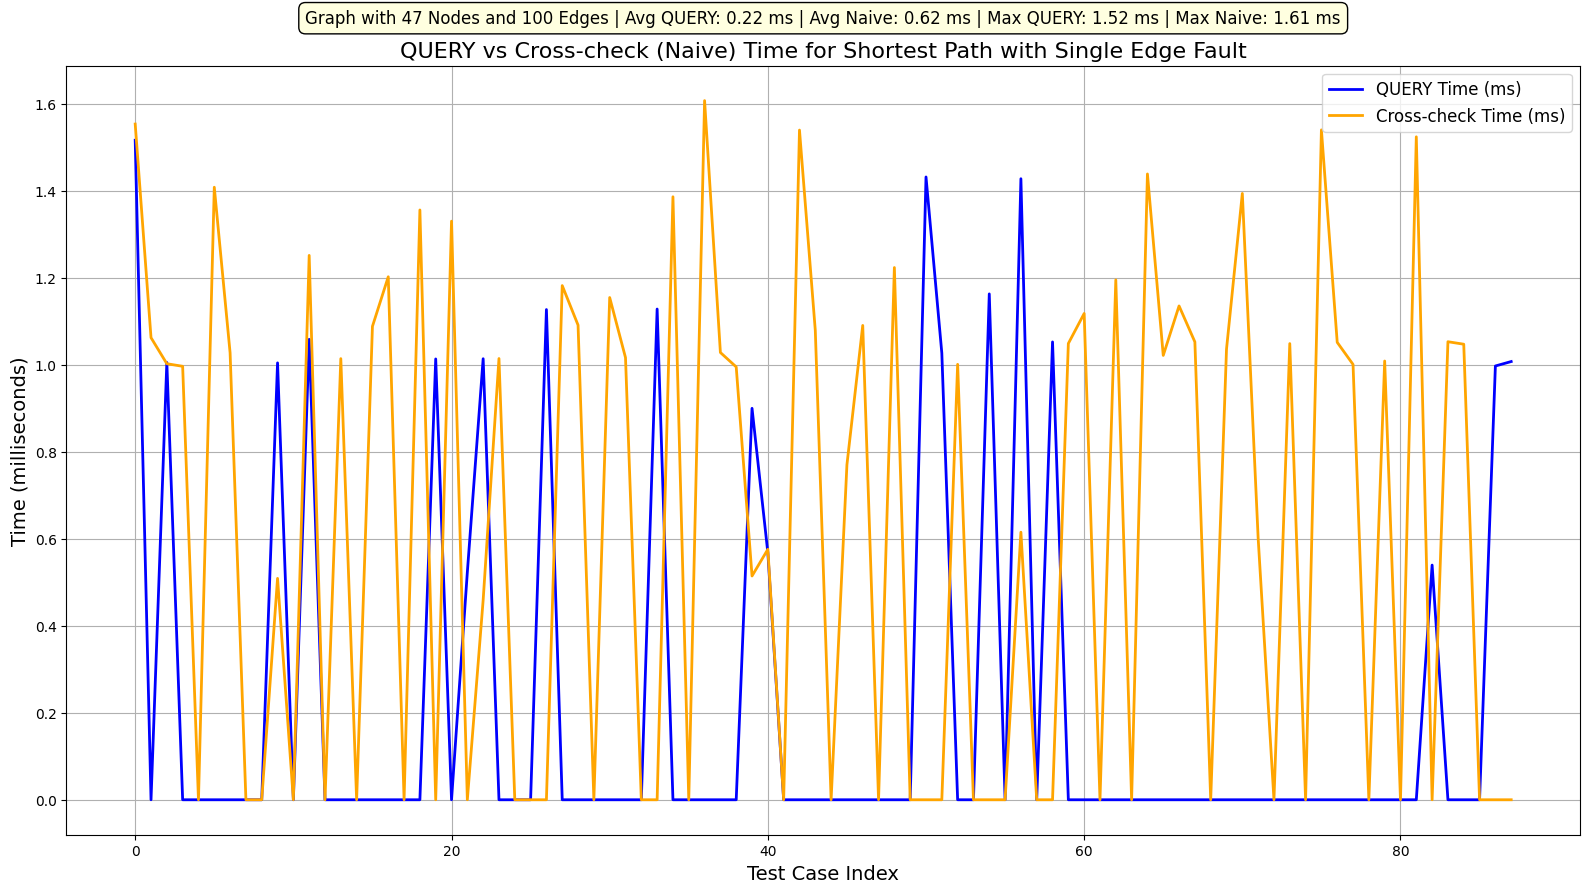

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# # Convert seconds to milliseconds
# query_time_ms = [t * 1_000 for t in query_time]
# naive_query_time_ms = [t * 1_000 for t in naive_query_time]

# # Compute statistics
# average_query_time = np.mean(query_time_ms)
# average_naive_time = np.mean(naive_query_time_ms)
# max_query_time = np.max(query_time_ms)
# max_naive_time = np.max(naive_query_time_ms)

# Create plot with access to axes
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(query_time_ms, label='QUERY Time (ms)', color='blue', linewidth=2)
ax.plot(naive_query_time_ms, label='Cross-check Time (ms)', color='orange', linewidth=2)
ax.set_xlabel("Test Case Index", fontsize=14)
ax.set_ylabel("Time (milliseconds)", fontsize=14)
ax.set_title("QUERY vs Cross-check (Naive) Time for Shortest Path with Single Edge Fault", fontsize=16)
ax.legend(fontsize=12)
ax.grid(True)

# Add stats text box above the plot
stats_text = (
    f"Graph with {len(G.nodes())} Nodes and {len(G.edges())} Edges | "
    f"Avg QUERY: {average_query_time:.2f} ms | "
    f"Avg Naive: {average_naive_time:.2f} ms | "
    f"Max QUERY: {max_query_time:.2f} ms | "
    f"Max Naive: {max_naive_time:.2f} ms"
)
ax.text(0.5, 1.05, stats_text, transform=ax.transAxes,
        ha='center', va='bottom', fontsize=12,
        bbox=dict(boxstyle="round,pad=0.4", edgecolor='black', facecolor='lightyellow'))

# Adjust layout to fit text
plt.subplots_adjust(top=0.88)
plt.tight_layout()
plt.show()


#**-----------------2-fault distance oracle----------------**


##Basic Function


In [24]:
# f = 2

In [25]:



def edge_in_path(p, F2):
    if len(p) < 2:
        return False
    p_edges = set([(p[i], p[i+1]) for i in range(len(p) - 1)])  
    for edge in F2:
        if (edge.u ,edge.v) in p_edges or (edge.v , edge.u) in p_edges:
            return True
    return False

#updated function








# def bfs_tree_of_S_rooted_x(graph, s, x):
#     # Generate BFS tree rooted at x
#     bfs_tree_s = nx.bfs_tree(graph, s)
#     # Check if u is in the BFS tree rooted at x
#     if x in bfs_tree_s.nodes:
#         # BFS tree rooted at u from the BFS tree rooted at s
#         bfs_tree_x = nx.bfs_tree(bfs_tree_s, x)
#         bfs_tree_nodes = list(bfs_tree_x.nodes)
#         return bfs_tree_nodes
#     else:
#         # print(f"Node {x} is not in the BFS tree rooted at {s}")
#         return None
# def intact_from_failure_path(path, F):
#     if path is None:
#         return True

#     path_edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]

#     if len(F) == 0:
#         return True

#     if isinstance(F, list) and len(F) == 2 and all(isinstance(x, int) for x in F):
#         if (F[0], F[1]) in path_edges or (F[1], F[0]) in path_edges:
#             return False
#         return True

#     for edge in F:
#         if isinstance(edge, tuple):
#             if (edge[0], edge[1]) in path_edges or (edge[1], edge[0]) in path_edges:
#                 return False
#         elif isinstance(edge, list):
#             if (edge[0], edge[1]) in path_edges or (edge[1], edge[0]) in path_edges:
#                 return False
#         elif hasattr(edge, 'u') and hasattr(edge, 'v'):
#             if (edge.u, edge.v) in path_edges or (edge.v, edge.u) in path_edges:
#                 return False
#         else:
#             print(f"Unexpected edge type: {type(edge)}")
#             return False

#     return True


def intact_from_failure_path(path, F):
    if path is None:
        return False
    if len(path)==1:
        return False

    path_dist = D[path[0]][path[-1]]

    if len(F) == 0:
        return True


    for edge in F:
        u, v = edge.u, edge.v
        wt = G[u][v]["weight"] if G.has_edge(u, v) else G[v][u]["weight"]

        if (
            isclose(D[path[0]][u] + wt + D[path[-1]][v], path_dist) or
            isclose(D[path[0]][v] + wt + D[path[-1]][u], path_dist)
        ):
            return False
        
    return True





def intact_from_failure_tree(T, F):
    # Check if F is empty
    if T is None:
        # print("bfs_tree_of_S_rooted_x returned None")
        return True
    if not F:
        return True
    
    if isinstance(F, list) and len(F) == 2 and all(isinstance(x, int) for x in F):
        if F[0] in T or F[1] in T:
            return False
        return True

    # Check if any vertex in F is in the tree T
    for edge in F:
        # Unpack edge into u and v
        if isinstance(edge, Edge):
            u, v = edge.u, edge.v
        elif isinstance(edge, tuple) or isinstance(edge, list):
            u, v = edge
        else:
            print(f"Unexpected edge type: {type(edge)}")
            return False

        if u in T or v in T:
            return False

    return True
# def single_edge_in_path(p, F2):
#     if F2 is None or F2 == []:
#         return False
#     if p==[] or p is None or len(p)==1:
#         return False
    
#     p_dist = D[p[0]][p[-1]]
        
#     for edge in F2:
#         # unpack edge into u and v
#         if isinstance(edge, Edge):
#             u, v = edge.u, edge.v
#         else:
#             u,v = edge
#         # check if the edge is in the path
#         if (D[p[0]][u] + G[u][v]["weight"] + D[p[-1]][v]) == p_dist or (D[p[0]][v] + G[u][v]["weight"] + D[p[-1]][u]) == p_dist:
#             return True
#     return False

In [26]:
import heapq

def bfs_tree_with_sorting(G, root):
    tree = nx.DiGraph()
    visited = set()
    priority_queue = [(0, root, None)]  # (distance, node, parent)

    while priority_queue:
        distance, node, parent = heapq.heappop(priority_queue)
        if node not in visited:
            visited.add(node)
            if parent is not None:
                tree.add_edge(parent, node)
            for neighbor in G.neighbors(node):
                if neighbor not in visited:
                    edge_weight = G[node][neighbor].get('weight', 1)  # Default weight is 1 if not specified
                    heapq.heappush(priority_queue, (distance + edge_weight, neighbor, node))
    return tree


def bfs_tree_of_S_rooted_x(graph, s, x):
    # Generate BFS tree rooted at x
    bfs_tree_s = bfs_tree_with_sorting(graph, s)
    # Check if u is in the BFS tree rooted at x
    if x in bfs_tree_s.nodes:
        # BFS tree rooted at u from the BFS tree rooted at s
        bfs_tree_x = nx.bfs_tree(bfs_tree_s, x)
        bfs_tree_nodes = list(bfs_tree_x.nodes)
        return bfs_tree_nodes
    else:
        # print(f"Node {x} is not in the BFS tree rooted at {s}")
        return None
    
    

In [27]:
# import heapq

# def build_hierarchical_tree_with_priority(G, root):
#     tree = nx.DiGraph()
#     visited = set()
#     priority_queue = [(0, root, None)]  # (distance, node, parent)

#     while priority_queue:
#         distance, node, parent = heapq.heappop(priority_queue)
#         if node not in visited:
#             visited.add(node)
#             if parent is not None:
#                 tree.add_edge(parent, node)
#             for neighbor in G.neighbors(node):
#                 if neighbor not in visited:
#                     edge_weight = G[node][neighbor].get('weight', 1)  # Default weight is 1 if not specified
#                     heapq.heappush(priority_queue, (distance + edge_weight, neighbor, node))
#     return tree



# def hierarchy_pos(G, root, width=1.0, vert_gap=0.5, vert_loc=0, xcenter=0.5, pos=None, parent=None):
#     """
#     Create a layout dictionary that positions nodes in a hierarchy.
#     """
#     if pos is None:
#         pos = {root: (xcenter, vert_loc)}
#     children = list(G.successors(root))
#     if len(children) != 0:
#         dx = width / len(children)
#         nextx = xcenter - width / 2 - dx / 2
#         for child in children:
#             nextx += dx
#             pos[child] = (nextx, vert_loc - vert_gap)
#             pos = hierarchy_pos(G, child, width=dx, vert_gap=vert_gap,
#                                 vert_loc=vert_loc - vert_gap, xcenter=nextx, pos=pos, parent=root)
#     return pos


# # Build the tree with priority
# tree = build_hierarchical_tree_with_priority(G, 14)
# print(tree)
# pos = hierarchy_pos(tree, 14)

# # Draw the tree
# plt.figure(figsize=(25, 6))
# nx.draw(tree, pos, with_labels=True, node_size=2000, node_color='lightblue', arrows=True)
# plt.title("Hierarchical Tree with Priority (Shortest Distance First)")
# plt.show()

# # // if i have to  explore node that have shortest distance first


#Maximizer Functions


In [28]:
# # load all maximizer_dict
# with open('maximizer_dict1.pkl', 'rb') as f:
#     maximizer_dict1 = pickle.load(f)
# with open('maximizer_dict21.pkl', 'rb') as f:
#     maximizer_dict21 = pickle.load(f)
# with open('maximizer_dict2.pkl', 'rb') as f:
#     maximizer_dict2 = pickle.load(f)
# with open('maximizer_dict3.pkl', 'rb') as f:
#     maximizer_dict3 = pickle.load(f)

In [29]:

from itertools import combinations


def maximizer1(G, x, y, d1, d2):

    max_xy_edge = None
    max_xy_path = None
    max_xy_distance = float("-inf")
    max_xy_path_new = None

    possible_edges = combinations(G.edges, 2)
    
    for F_star in possible_edges:
        # print(F_star)
        eu , ev = F_star[0]
        eu1 , ev1 = F_star[1]
        
        # print(F_star)
        
        if (
            (D[x][eu1] >= d1 and D[x][eu] >= d1 and D[x][ev1] >= d1 and D[x][ev] >= d1)
            and ( D[y][ev1] >= d2 and  D[y][ev] >= d2 and D[y][eu1] >= d2 and D[y][eu] >= d2)
        ):  
            
            edge1_data = G.get_edge_data(eu , ev)
            edge2_data = G.get_edge_data(eu1, ev1)
            G.remove_edge(eu, ev)
            G.remove_edge(eu1, ev1)
            if not nx.has_path(G, x, y):
                G.add_edge(eu1, ev1, **edge2_data)
                G.add_edge(eu , ev , **edge1_data)
                continue

            path2 = nx.dijkstra_path(G, x, y, weight="weight")
            path2_distance = sum(
                get_edge_weight(G, path2[i], path2[i + 1]) for i in range(len(path2) - 1)
            )
            if path2_distance > max_xy_distance:
                max_xy_edge = [(eu, ev), (eu1, ev1)]
                max_xy_path = path2
                max_xy_distance = path2_distance
            G.add_edge(eu, ev, **edge1_data)
            G.add_edge(eu1, ev1, **edge2_data)


    if max_xy_path is not None:
        s = 0
        max_xy_path_new = []
        for i in range(len(max_xy_path) - 1):
            u = max_xy_path[s]
            v = max_xy_path[i + 1]
            uv_distance = D[u][v]
            uv_distance_path = sum(
                get_edge_weight(G, max_xy_path[j], max_xy_path[j + 1])
                for j in range(s, i + 1)
            )
            if uv_distance != uv_distance_path:
                if i < (len(max_xy_path) - 2):
                    s_to_a_path = [u]
                    intermediate_edge = (v, max_xy_path[i + 2])
                    s_to_a_path.append(max_xy_path[i])
                    max_xy_path_new.append(s_to_a_path)
                    max_xy_path_new.append(intermediate_edge)
                    s = i + 2
        max_xy_path_new.append([u, max_xy_path[len(max_xy_path) - 1]])
        if len(max_xy_path_new) == 1:
            max_xy_path_new = [max_xy_path]
        if len(max_xy_path_new) == 3:
            max_xy_path_new = [max_xy_path]

    return max_xy_edge, max_xy_path_new

In [30]:
maximizer1(G , 0 , 45 , 0 , 0)

([(45, 6), (45, 12)], [[0, 45]])

In [31]:
# from concurrent.futures import ProcessPoolExecutor, as_completed
# import networkx as nx
# import tqdm
# import time
# import os
# import pickle


# # Initialize dictionary
# maximizer_dict1 = {}


# maximizer_function = maximizer1

# # Collect errors
# errors = []

# start_time = time.time()

# def process_pair(chunk_data):
#     chunk_results = {}
#     chunk_errors = []

#     for x, y, d1, d2 in chunk_data:
#         try:
#             result = maximizer_function(G, x, y, d1, d2)
#             if result is not None:
#                 chunk_results[(x, y, d1, d2)] = result
#         except Exception as e:
#             chunk_errors.append(f"Error processing ({x}, {y}, {d1}, {d2}): {str(e)}")
#     return chunk_results, chunk_errors

# nodes = list(G.nodes())

# # Generate pairs (renamed to avoid collision)
# pair_combinations = [
#     (x, y, d1, d2)
#     for x in nodes
#     for y in nodes
#     for d1 in d1_d2_list
#     for d2 in d1_d2_list
#     if x != y
# ]

# print(f"Number of combinations: {len(pair_combinations)}")

# # Calculate chunk size and split without NumPy
# n_cores = os.cpu_count()
# chunk_size = max(1, len(pair_combinations) // (n_cores * 4))
# n_chunks = (len(pair_combinations) + chunk_size - 1) // chunk_size  # Ceiling division

# # Custom function to split list into chunks
# def split_into_chunks(lst, n_chunks):
#     chunks = []
#     for i in range(n_chunks):
#         start = i * chunk_size
#         end = min((i + 1) * chunk_size, len(lst))
#         if start < len(lst):  # Only add non-empty chunks
#             chunks.append(lst[start:end])
#     return chunks

# chunks = split_into_chunks(pair_combinations, n_chunks)
# print(f"Number of chunks: {len(chunks)}")

# # Process chunks using ProcessPoolExecutor
# with ProcessPoolExecutor() as executor:
#     futures = [executor.submit(process_pair, chunk) for chunk in chunks]
#     for future in tqdm.tqdm(
#         as_completed(futures), 
#         total=len(futures),
#         desc="Processing pairs"
#     ):
#         results, chunk_errors = future.result()
#         maximizer_dict1.update(results)
#         errors.extend(chunk_errors)

# # Print errors
# for error in errors:
#     print(error)

# # Performance metrics
# end_time = time.time()
# total_time = end_time - start_time
# pairs_processed = len(pair_combinations)
# pairs_successful = len(maximizer_dict1)

# print(f"\nMaximizer1 Performance Summary:")
# print(f"Total time: {total_time:.2f} seconds")
# print(f"Pairs processed: {pairs_processed}")
# print(f"Successful pairs: {pairs_successful}")
# print(f"Success rate: {(pairs_successful/pairs_processed)*100 if pairs_processed > 0 else 0:.2f}%")

# with open('maximizer_dict1.pkl', 'wb') as f:
#     pickle.dump(maximizer_dict1, f)



In [32]:
# # load maximizer_dict from the local file
with open('maximizer_dict1.pkl', 'rb') as f:
    maximizer_dict1 = pickle.load(f)

In [33]:
from itertools import combinations

def maximizer21(G, x, y, d1, V):
    G = G.copy()
    max_xy_edge = None
    max_xy_path = None
    max_xy_distance = float("-inf")
    max_xy_path_new = None


    possible_edges = combinations(list(G.edges) , 2)
    for F_star in possible_edges:
        eu , ev = F_star[0];
        eu1 , ev1 = F_star[1]
        if (
            nx.has_path(G, x, eu1)
            and nx.has_path(G, y, ev1)
            and (
                D[x][eu1] >= d1  and D[x][eu] >= d1 and D[x][ev1] >= d1 and D[x][ev] >= d1
            )
            and intact_from_failure_path(shortest_paths[(V, y)], F_star)
            and intact_from_failure_tree(txu_dict[(y, V)], F_star)
        ):
            edge1_data = G.get_edge_data(eu, ev)    
            edge2_data = G.get_edge_data(eu1, ev1)
            
            G.remove_edge(eu, ev)
            G.remove_edge(eu1, ev1) 
            if not nx.has_path(G, x, y):
                G.add_edge(eu, ev, **edge1_data)
                G.add_edge(eu1, ev1, **edge2_data)
                continue

            path2 = nx.dijkstra_path(G, x, y, weight="weight")
            path2_distance = sum(
                get_edge_weight(G, path2[i], path2[i + 1])
                for i in range(len(path2) - 1)
            )
            if path2_distance > max_xy_distance:
                max_xy_edge = [(eu, ev), (eu1, ev1)]
                max_xy_path = path2
                max_xy_distance = path2_distance

            G.add_edge(eu1, ev1, **edge2_data)
            G.add_edge(eu, ev, **edge1_data)

    if max_xy_path is not None:
        s = 0
        max_xy_path_new = []
        for i in range(len(max_xy_path) - 1):
            u = max_xy_path[s]
            v = max_xy_path[i + 1]
            uv_distance = D[u][v]
            uv_distance_path = sum(
                get_edge_weight(G, max_xy_path[j], max_xy_path[j + 1])
                for j in range(s, i + 1)
            )
            if uv_distance != uv_distance_path:
                if i < (len(max_xy_path) - 2):
                    s_to_a_path = [u]
                    intermediate_edge = (v, max_xy_path[i + 2])
                    s_to_a_path.append(max_xy_path[i])
                    max_xy_path_new.append(s_to_a_path)
                    max_xy_path_new.append(intermediate_edge)
                    s = i + 2
        max_xy_path_new.append([u, max_xy_path[len(max_xy_path) - 1]])
        if len(max_xy_path_new) == 1:
            max_xy_path_new = [max_xy_path]
        if len(max_xy_path_new) == 3:
            max_xy_path_new = [max_xy_path]

    return max_xy_edge, max_xy_path_new

In [34]:
# maximizer_dict21[(0, 18, 128, 23)]
# # maximizer21(G, 0, 18, 128, 23)

In [35]:
# from concurrent.futures import ProcessPoolExecutor, as_completed
# from tqdm import tqdm
# import networkx as nx
# import time
# import pickle
# import os
# import logging

# # Configure logging
# logging.basicConfig(
#     filename='maximizer21.log',  # Log file name
#     filemode='a',               # Append mode
#     level=logging.INFO,         # Logging level
#     format='%(asctime)s - %(message)s'
# )

# # Initialize a dictionary to store the maximizer output
# maximizer_dict21 = {}

# maximizer_function = maximizer21

# # Collect errors to print after the loop
# errors = []

# start_time = time.time()

# # Define a function to process a single pair of nodes
# def process_pair(x, y, d1, v):
#     try:
#         G_copy = G.copy()
#         result = maximizer_function(G_copy, x, y, d1, v)
#         if result is not None:
#             max_edge, max_path = result
#             return (x, y, d1, v), (max_edge, max_path)
#     except nx.NetworkXNoPath:
#         return (x, y, d1, v), None
#     except Exception as e:
#         logging.error(f"Error processing pair ({x}, {y}, {d1}, {v}): {str(e)}")
#         return (x, y, d1, v), None


# nodes = list(G.nodes)

# num_cores = os.cpu_count()
# # Use ProcessPoolExecutor to parallelize the computation
# with ProcessPoolExecutor(max_workers=num_cores) as executor:
#     futures = []
#     for x in nodes:
#         for y in nodes:
#             if x != y:
#                 for d1 in d1_d2_list:
#                     for d2 in d1_d2_list:
#                         F_star, xy_f_star = maximizer_dict1[(x, y, d1, d2)]
#                         F_star_vertex = []

#                         if F_star is not None and F_star != []:
#                             if not isinstance(F_star, list):
#                                 F_star = list(F_star)
#                             if isinstance(F_star[0], int):
#                                 F_star_vertex = [F_star[0], F_star[1]]
#                             else:
#                                 F_star_vertex = [vertex for E in F_star for vertex in E]
#                         for v in F_star_vertex:
#                             futures.append(
#                                 executor.submit(process_pair, x, y, d1, v)
#                             )

#     # Use tqdm to show progress for the futures
#     for future in tqdm(as_completed(futures), total=len(futures), desc="Processing pairs"):
#         key, result = future.result()
#         if result is not None:
#             logging.info(f"Result: {key}: {result}")
#             maximizer_dict21[key] = result
#         else:
#             error_message = f"No path between {key[0]} and {key[1]} for d1: {key[2]}, d2: {key[3]}."
#             logging.error(error_message)
#             errors.append(error_message)

# # Print all errors after the loop
# for error in errors:
#     print(error)

# # Calculate and print performance metrics
# end_time = time.time()
# total_time = end_time - start_time
# pairs_processed = len(futures)
# pairs_successful = len(maximizer_dict21)

# print(f"\nPerformance Summary:")
# print(f"Total time: {total_time:.2f} seconds")
# print(f"Pairs processed: {pairs_processed}")
# print(f"Successful pairs: {pairs_successful}")
# print(f"Success rate: {(pairs_successful/pairs_processed)*100:.2f}%")

# # Save the results to a file
# with open('maximizer_dict21.pkl', 'wb') as f:
#     pickle.dump(maximizer_dict21, f)

# logging.info("Results saved to maximizer_dict21.pkl")

In [36]:
# import logging
# from concurrent.futures import ProcessPoolExecutor, as_completed
# from tqdm import tqdm
# import networkx as nx
# import time
# import pickle
# import os
# import numpy as np

# # Setup logging
# logging.basicConfig(filename='processing_errors.log', level=logging.ERROR)

# # Initialize a dictionary to store the maximizer output
# maximizer_dict21 = {}

# # Store the maximizer function reference directly
# maximizer_function = maximizer21  # Replace 'maximizer21' with the actual function name

# # Collect errors to print after the loop
# errors = []

# start_time = time.time()

# # Define a function to process a single pair of nodes
# def process_pair(x, y, d1, v):
#     try:
#         if (x, y, d1, v) in maximizer_dict21:
#             return (x, y, d1, v), maximizer_dict21[(x, y, d1, v)]   
#         result = maximizer_function(G, x, y, d1, v)
#         if result is not None:
#             max_edge, max_path = result
#             return (x, y, d1, v), (max_edge, max_path)
#     except nx.NetworkXNoPath:
#         return (x, y, d1, v), None
#     except Exception as e:
#         logging.error(f"Error for ({x}, {y}, {d1}, {v}): {str(e)}")
#         return (x, y, d1, v ), f"Error: {str(e)}"

# def main():
#     start_time = time.time()

#     # Load graph and other data
#     with open('graph.pkl', 'rb') as f:
#         G = pickle.load(f)
#     with open('maximizer_dict1.pkl', 'rb') as f:
#         maximizer_dict1 = pickle.load(f)

#     nodes = list(G.nodes)

#     combinations = [
#         (x, y, d1, v)
#         for x in nodes
#         for y in nodes
#         if x != y
#         for d1 in d1_d2_list
#         for d2 in d1_d2_list
#         for F_star, xy_f_star in [maximizer_dict1[(x, y, d1, d2)]]
#         if F_star is not None and F_star != []
#         for F_star_vertex in [[F_star[0], F_star[1]] if isinstance(F_star[0], int) else [vertex for E in F_star for vertex in E]]
#         for v in F_star_vertex
#     ]

#     # Calculate optimal chunk size based on CPU cores
#     n_cores = os.cpu_count()
#     chunk_size = max(1, len(combinations) // (n_cores * 4))
#     chunks = np.array_split(combinations, len(combinations) // chunk_size)

#     # Process chunks using ProcessPoolExecutor for true parallelism
#     with ProcessPoolExecutor(max_workers=n_cores) as executor:
#         futures = [executor.submit(process_pair, *args) for args in combinations]

#         for future in tqdm(as_completed(futures), total=len(futures), desc="Processing pairs"):
#             key, result = future.result()
#             if result is not None:
#                 maximizer_dict21[key] = result
#             else:
#                 errors.append(f"No path between {key[0]} and {key[1]} for d1: {key[2]}, d2: {key[3]}.")
#                 maximizer_dict21[key] = None , None
#             print(f"Processed: {key} , Result: {result}")
#     # Print all errors after the loop
#     for error in errors:
#         print(error)

#     # Calculate and print performance metrics
#     end_time = time.time()
#     total_time = end_time - start_time
#     pairs_processed = len(combinations)
#     pairs_successful = len(maximizer_dict21)

#     print(f"\nMaximizer21 Performance Summary:")
#     print(f"Total time: {total_time:.2f} seconds")
#     print(f"Pairs processed: {pairs_processed}")
#     print(f"Successful pairs: {pairs_successful}")
#     print(f"Success rate: {(pairs_successful/pairs_processed)*100:.2f}%")

#     # Save the updated dictionary back to the file
#     with open('maximizer_dict21.pkl', 'wb') as f:
#         pickle.dump(maximizer_dict21, f)

# if __name__ == "__main__":
#     main()

In [37]:
with open('maximizer_dict21.pkl', 'rb') as f:
    maximizer_dict21 = pickle.load(f)   

In [38]:
from itertools import combinations
def maximizer2(G, x, y, V, d2):
    G = G.copy()

    max_xy_edge = None
    max_xy_path = None
    max_xy_distance = float("-inf")
    max_xy_path_new = None


    possible_edges = combinations(list(G.edges) , 2);
    for F_star in possible_edges:
        eu , ev = F_star[0]
        eu1 , ev1 = F_star[1]
 
        Vx_path = shortest_paths[(V, x)]
        txV = txu_dict[(x, V)]  
        if (
            nx.has_path(G, x, eu1)
            and nx.has_path(G, y, ev1)
            and (
                D[y][ev1] >= d2  and D[y][ev] >= d2 and D[y][ev1] >= d2 and D[y][ev] >= d2
            )
            and (intact_from_failure_path(Vx_path, F_star)
            and intact_from_failure_tree(txV, F_star))
        ):  
            edge1_data = G.get_edge_data(eu , ev)
            edge2_data = G.get_edge_data(eu1, ev1)
            G.remove_edge(eu, ev)
            G.remove_edge(eu1, ev1)
            if not nx.has_path(G, x, y):
                G.add_edge(eu1, ev1, **edge2_data)
                G.add_edge(eu, ev, **edge1_data)
                continue

            path2 = nx.dijkstra_path(G, x, y, weight="weight")
            path2_distance = sum(
                get_edge_weight(G, path2[i], path2[i + 1]) for i in range(len(path2) - 1)
            )
            if path2_distance > max_xy_distance:
                max_xy_edge = [(eu, ev), (eu1, ev1)]
                max_xy_path = path2
                max_xy_distance = path2_distance

            G.add_edge(eu1, ev1, **edge2_data)

            G.add_edge(eu, ev, **edge1_data)

    if max_xy_path is not None:
        s = 0
        max_xy_path_new = []
        for i in range(len(max_xy_path) - 1):
            u = max_xy_path[s]
            v = max_xy_path[i + 1]
            uv_distance = D[u][v]
            uv_distance_path = sum(
                get_edge_weight(G, max_xy_path[j], max_xy_path[j + 1])
                for j in range(s, i + 1)
            )
            if uv_distance != uv_distance_path:
                if i < (len(max_xy_path) - 2):
                    s_to_a_path = [u]
                    intermediate_edge = (v, max_xy_path[i + 2])
                    s_to_a_path.append(max_xy_path[i])
                    max_xy_path_new.append(s_to_a_path)
                    max_xy_path_new.append(intermediate_edge)
                    s = i + 2
        max_xy_path_new.append([u, max_xy_path[len(max_xy_path) - 1]])
        if len(max_xy_path_new) == 1:
            max_xy_path_new = [max_xy_path]
        if len(max_xy_path_new) == 3:
            max_xy_path_new = [max_xy_path]

    return max_xy_edge, max_xy_path_new

In [39]:
with open('maximizer_dict2.pkl', 'rb') as f:
    maximizer_dict2 = pickle.load(f)    


In [40]:
# maximizer_dict2[(23, 1, 21, 0)]

In [41]:
# from concurrent.futures import ProcessPoolExecutor, as_completed
# from tqdm import tqdm
# import pickle

# # Function to process a single key
# def process_key(x, y, v, d2):
#     try:
        
#         value = maximizer2(G, x, y, v, d2)
#         return (x, y, v, d2), value

#     except Exception as e:
#         print(f"Error processing key ({x}, {y}, {v}, {d2}): {e}")
#     return None


# futures = []
# results = []

# # Use ProcessPoolExecutor for parallel processing
# with ProcessPoolExecutor() as executor:
#     # Submit tasks to the executor

    
#     for x, y, v, d2 in keys_list:
#         futures.append(executor.submit(process_key, x, y, v, d2))
   
#     # Process completed futures
#     for future in tqdm(as_completed(futures), total=len(futures), desc="Processing keys"):
#         result = future.result()
#         if result:
#             results.append(result)

# # Update the dictionary with results
# for key, value in results:
#     maximizer_dict2[key] = value

# # Save the updated dictionary to a file
# with open(maximizer_dict2.pkl, 'wb') as f:
#     pickle.dump(maximizer_dict2, f)

# print(f"Processing complete. Results saved to {maximizer_dict2}.")


In [42]:
# # dump
# with open('maximizer_dict2.pkl', 'wb') as f:
#     pickle.dump(maximizer_dict2, f)

In [43]:
with open('maximizer_dict2.pkl', 'rb') as f:
    maximizer_dict2 = pickle.load(f)

In [44]:
len(maximizer_dict2)

163327

In [45]:
# from concurrent.futures import ProcessPoolExecutor, as_completed
# from tqdm import tqdm
# import networkx as nx
# import time
# import pickle
# import os
# import logging

# # Configure logging
# logging.basicConfig(
#     filename='maximizer2.log',  # Log file name
#     filemode='a',              # Append mode
#     level=logging.INFO,        # Logging level
#     format='%(asctime)s - %(levelname)s - %(message)s'
# )

# # Initialize a dictionary to store the maximizer output
# maximizer_dict2 = {}

# maximizer_function = maximizer2

# # Collect errors to print after the loop
# errors = []

# start_time = time.time()

# # Define a function to process a single pair of nodes
# def process_pair(x, y, v, d2):
#     try:
#         G_copy = G.copy()
#         result = maximizer_function(G_copy, x, y, v, d2)
#         if result is not None:
#             max_edge, max_path = result
#             logging.info(f"Processed pair ({x}, {y}, {v}, {d2}): Success")
#             return (x, y, v, d2), (max_edge, max_path)
#     except nx.NetworkXNoPath:
#         logging.warning(f"No path found for pair ({x}, {y}, {v}, {d2})")
#         return (x, y, v, d2), None
#     except Exception as e:
#         logging.error(f"Error processing pair ({x}, {y}, {v}, {d2}): {str(e)}")
#         return (x, y, v, d2), None

# nodes = list(G.nodes)

# num_cores = os.cpu_count()
# logging.info(f"Starting computation with {num_cores} cores and {len(nodes)} nodes.")

# # Use ProcessPoolExecutor to parallelize the computation
# with ProcessPoolExecutor(max_workers=num_cores) as executor:
#     futures = []
#     for x in nodes:
#         for y in nodes:
#             if x != y:
#                 for d1 in d1_d2_list:
#                     for d2 in d1_d2_list:
#                         F_star, xy_f_star = maximizer_dict1[(x, y, d1, d2)]
#                         F_star_vertex = []

#                         if F_star is not None and F_star != []:
#                             if not isinstance(F_star, list):
#                                 F_star = list(F_star)
#                             if isinstance(F_star[0], int):
#                                 F_star_vertex = [F_star[0], F_star[1]]
#                             else:
#                                 F_star_vertex = [vertex for E in F_star for vertex in E]
#                         for v in F_star_vertex:
#                             futures.append(
#                                 executor.submit(process_pair, x, y, v, d2)
#                             )

#     # Use tqdm to show progress for the futures
#     for future in tqdm(as_completed(futures), total=len(futures), desc="Processing pairs"):
#         try:
#             key, result = future.result()
#             if result is not None:
#                 logging.info(f"Result for {key}: {result}")
#                 maximizer_dict2[key] = result
#             else:
#                 error_message = f"No path between {key[0]} and {key[1]} for d1: {key[2]}, d2: {key[3]}."
#                 logging.warning(error_message)
#                 errors.append(error_message)
#         except Exception as e:
#             logging.error(f"Error processing future: {str(e)}")

# # Print all errors after the loop
# for error in errors:
#     logging.warning(error)

# # Calculate and print performance metrics
# end_time = time.time()
# total_time = end_time - start_time
# pairs_processed = len(futures)
# pairs_successful = len(maximizer_dict2)

# logging.info(f"\nPerformance Summary:")
# logging.info(f"Total time: {total_time:.2f} seconds")
# logging.info(f"Pairs processed: {pairs_processed}")
# logging.info(f"Successful pairs: {pairs_successful}")
# logging.info(f"Success rate: {(pairs_successful/pairs_processed)*100:.2f}%")

# # Save the results to a file
# with open('maximizer_dict2.pkl', 'wb') as f:
#     pickle.dump(maximizer_dict2, f)

# logging.info("Results saved to maximizer_dict2.pkl")

In [46]:
def maximizer3(G, x, y, U, V):
    G = G.copy()    

    max_xy_edge = None
    max_xy_path = None
    max_xy_distance = float("-inf")
    max_xy_path_new = []


    
    # if not ((intact_from_failure_path(shortest_paths[(x, u)], F_star) and intact_from_failure_tree(bfs_tree_of_S_rooted_x(G, x, u), F_star)) 
    #     and (intact_from_failure_path(shortest_paths[(v, y)], F_star) and intact_from_failure_tree(bfs_tree_of_S_rooted_x(G, y, v), F_star))):
    #     return [], []
    

    possible_edges = combinations(list(G.edges) , 2)

    for F_star in possible_edges:
        eu , ev = F_star[0]
        eu1 , ev1 = F_star[1]
        xu_path = shortest_paths[(x, U)]
        vy_path = shortest_paths[(V, y)]
        bfsTree_txu = txu_dict[(x, U)]
        bfsTree_tyv = txu_dict[(y, V)]

        
        if (
            nx.has_path(G, x, eu1)
            and nx.has_path(G, y, ev1)
            and (intact_from_failure_path(xu_path, F_star)
            and intact_from_failure_tree(bfsTree_txu, F_star))
            and ((intact_from_failure_path(vy_path, F_star)
            and intact_from_failure_tree(bfsTree_tyv, F_star)))
        ):  
            
            edge1_data = G.get_edge_data(eu, ev)
            edge2_data = G.get_edge_data(eu1, ev1)
            G.remove_edge(eu, ev)
            G.remove_edge(eu1, ev1)
            if not nx.has_path(G, x, y):
                G.add_edge(eu, ev, **edge1_data)
                G.add_edge(eu1, ev1, **edge2_data)
                continue
            


            path2 = nx.dijkstra_path(G, x, y, weight="weight")
            path2_distance = sum(
                get_edge_weight(G, path2[i], path2[i + 1]) for i in range(len(path2) - 1)
            )
            if path2_distance > max_xy_distance:
                max_xy_edge = [(eu, ev), (eu1, ev1)]
                max_xy_path = path2
                max_xy_distance = path2_distance
            G.add_edge(eu1, ev1, **edge2_data)
            G.add_edge(eu, ev, **edge1_data)

                # print(f"added edge: {eu1, ev1}")

        # G.add_edge(eu, ev, **edge1_data)
        # added_edges.append((eu, ev))
        # print(f"added edge: {eu, ev}")

    if max_xy_path is not None:
        s = 0
        for i in range(len(max_xy_path) - 1):
            u = max_xy_path[s]
            v = max_xy_path[i + 1]
            uv_distance = D[u][v]
            uv_distance_path = sum(
                get_edge_weight(G, max_xy_path[j], max_xy_path[j + 1])
                for j in range(s, i + 1)
            )
            if uv_distance != uv_distance_path:
                if i < (len(max_xy_path) - 2):
                    s_to_a_path = [u]
                    intermediate_edge = (v, max_xy_path[i + 2])
                    s_to_a_path.append(max_xy_path[i])
                    max_xy_path_new.append(s_to_a_path)
                    max_xy_path_new.append(intermediate_edge)
                    s = i + 2
        max_xy_path_new.append([u, max_xy_path[len(max_xy_path) - 1]])
        if len(max_xy_path_new) == 1:
            max_xy_path_new = []
            max_xy_path_new.append(max_xy_path)
        if len(max_xy_path_new) == 3:
            max_xy_path_new = []
            max_xy_path_new.append(max_xy_path)

    # Compare removed and added edges
    # missing_edges = set(removed_edges) - set(added_edges)
    # if missing_edges:
    #     print(f"Missing edges: {missing_edges}")

    return max_xy_edge, max_xy_path_new

In [47]:
# maximizer2(G, 12, 47, 33, 0)   

# change intact from failure path for maximizer also

In [48]:
maximizer_dict2[(12, 47, 33, 0)]    

([(0, 45), (39, 47)], [[12, 37, 9, 14, 29, 33, 47]])

In [49]:
# from concurrent.futures import ProcessPoolExecutor, as_completed
# from tqdm import tqdm
# import networkx as nx
# import time
# import pickle
# import os
# import logging

# # Configure logging
# logging.basicConfig(filename='processing_errors.log', level=logging.INFO, filemode='a',
#                     format='%(asctime)s %(levelname)s:%(message)s')

# maximizer_function = maximizer3

# with open('maximizer_dict3.pkl', 'rb') as f:
#     maximizer_dict3 = pickle.load(f)  
    
# # Load graph and other data
# with open('graph.pkl', 'rb') as f:
#     G = pickle.load(f)  

# # Define a function to process a batch of pairs
# def process_batch(batch):
#     results = []
#     for x, y, u, v in batch:
#         if (x, y, u, v) in maximizer_dict3:
#             continue  # Skip if already processed
#         try:
#             results.append(((x, y, u, v), maximizer_function(G, x, y, u, v)))
#         except nx.NetworkXNoPath as e:
#             results.append(((x, y, u, v), f"NetworkXNoPath: {str(e)}"))
#         except Exception as e:
#             results.append(((x, y, u, v), f"Error: {str(e)}"))
#     return results

# def main():
#     start_time = time.time()


#     with open('maximizer_dict1.pkl', 'rb') as f:
#         maximizer_dict1 = pickle.load(f)
#     with open('maximizer_dict21.pkl', 'rb') as f:
#         maximizer_dict21 = pickle.load(f)
#     with open('maximizer_dict2.pkl', 'rb') as f:
#         maximizer_dict2 = pickle.load(f)
        


#     # Create batches of arguments
#     batch_size = 100  # Reduced batch size for better load balancing
#     batches = []
#     current_batch = []
#     processed_pairs = set()  # Track processed pairs to avoid duplicates

#     nodes = list(G.nodes)

#     for x in nodes:
#         for y in nodes:
#             for d1 in d1_d2_list:
#                 for d2 in d1_d2_list:
#                     if x != y:
#                         F_star1, xy_f_star1 = maximizer_dict1[(x, y, d1, d2)]

#                         F_star_vertex1 = []

#                         if F_star1 is not None and F_star1 != []:
#                             if not isinstance(F_star1, list):
#                                 F_star1 = list(F_star1)
#                             if isinstance(F_star1[0], int):
#                                 F_star_vertex1 = [F_star1[0], F_star1[1]]
#                             else:
#                                 F_star_vertex1 = [vertex for E in F_star1 for vertex in E]
#                         for v in F_star_vertex1:
#                             F_star2, xy_f_star2 = maximizer_dict2[(x, y, v, d2)]
#                             F_star21, xy_f_star21 = maximizer_dict21[(x, y, d1, v)]
#                             F_star_vertex2 = []
#                             F_star_vertex21 = []
#                             if F_star2 is not None and F_star2 != []:
#                                 if not isinstance(F_star2, list):
#                                     F_star2 = list(F_star2)
#                                 if isinstance(F_star2[0], int):
#                                     F_star_vertex2 = [F_star2[0], F_star2[1]]
#                                 else:
#                                     F_star_vertex2 = [vertex for E in F_star2 for vertex in E]

#                             if F_star21 is not None and F_star21 != []:
#                                 if not isinstance(F_star21, list):
#                                     F_star21 = list(F_star21)
#                                 if isinstance(F_star21[0], int):
#                                     F_star_vertex21 = [F_star21[0], F_star21[1]]
#                                 else:
#                                     F_star_vertex21 = [vertex for E in F_star21 for vertex in E]

#                             for u in F_star_vertex21:
#                                 pair = (x, y, u, v)
                              
#                                 current_batch.append(pair)
#                                 if len(current_batch) == batch_size:
#                                     batches.append(current_batch)
#                                     current_batch = []
#                             for u in F_star_vertex2:
#                                 pair = (x, y, u, v)

#                                 current_batch.append(pair)
#                                 if len(current_batch) == batch_size:
#                                     batches.append(current_batch)
#                                     current_batch = []
#     if current_batch:
#         batches.append(current_batch)
    
    
    

#     errors = []

#     # Use ProcessPoolExecutor to parallelize the computation
#     num_processes = os.cpu_count()-1
#     with ProcessPoolExecutor(max_workers=num_processes) as executor:
#         futures = [executor.submit(process_batch, batch) for batch in batches]

#         # Use tqdm to show progress for the futures
#         for future in tqdm(as_completed(futures), total=len(futures), desc="Processing batches"):
#             for key, result in future.result():
#                 if isinstance(result, str):
#                     errors.append(f"Error for {key}: {result}")
#                 else:
#                     logging.info(f"Processed pair {key}: {result}")
#                     maximizer_dict3[key] = result

#     # Log all errors after the loop
#     for error in errors:
#         logging.error(error)

#     # Calculate and print performance metrics
#     end_time = time.time()
#     total_time = end_time - start_time
#     pairs_processed = sum(len(batch) for batch in batches)
#     pairs_successful = len(maximizer_dict3)

#     print(f"\nPerformance Summary:")
#     print(f"Total time: {total_time:.2f} seconds")
#     print(f"Pairs processed: {pairs_processed}")
#     print(f"Successful pairs: {pairs_successful}")
#     print(f"Success rate: {(pairs_successful/pairs_processed)*100:.2f}%")

#     # Save the results to a file
#     with open('maximizer_dict3.pkl', 'wb') as f:
#         pickle.dump(maximizer_dict3, f)


# if __name__ == "__main__":
#     main()

In [50]:
# # Save the results to a file
# with open('maximizer_dict3.pkl', 'wb') as f:
#     pickle.dump(maximizer_dict3, f)

In [51]:
# load all maximizer_dict
with open('maximizer_dict1.pkl', 'rb') as f:
    maximizer_dict1 = pickle.load(f)
with open('maximizer_dict21.pkl', 'rb') as f:
    maximizer_dict21 = pickle.load(f)
with open('maximizer_dict2.pkl', 'rb') as f:
    maximizer_dict2 = pickle.load(f)
with open('maximizer_dict3.pkl', 'rb') as f:
    maximizer_dict3 = pickle.load(f)

=====================================Findpath Function=============================


In [52]:
f=2

In [53]:



# def FINDPATHS(G ,s, t, F2):
    
    
#     F_prime = []
#     P = []
    
    
#     for i in range(1, f + 1):
#         if F_prime:
#             u, v, weight = F_prime[i - 2].u, F_prime[i - 2].v, F_prime[i - 2].weight
#             # print(f"u:{u}, v:{v}, weight:{weight}")
#             P_i = QUERY(G,s, t, Edge(u, v, weight))
#             # print(f"P_i:{P_i}")
#             # print(f"u:{u}, v:{v}, weight:{weight}")
#         else:
#             P_i = QUERY(G, s, t, F_prime)
            

#         P.append(P_i)
        
#         if P_i == []:
#             continue

#         weight_p_i = sum(
#             get_edge_weight(G, P_i[i], P_i[i + 1]) for i in range(len(P_i) - 1)
#         )
#         if F_prime:
#             F2.remove(F_prime[i - 2])  
#         else:
#             F2 = F2
#         for e1 in F2:
#             if D[s][e1.u] > D[s][e1.v]:
#                 e1.u, e1.v = e1.v, e1.u
            
#             flag = 0
#             if F_prime:
#                 R1 = QUERY(G, s, e1.u, Edge(u, v, weight))
#                 if(e1.v == t):
#                     R2 = QUERY(G, e1.u, t, Edge(u, v, weight))
#                 else: 
#                     R2 = QUERY(G, e1.v, t, Edge(u, v, weight))
#             else:
#                 R1 = QUERY(G, s, e1.u, F_prime)
#                 # if(e1.v == t):
#                 #     R2 = QUERY(e1.u, t, F_prime)
#                 # else: 
#                 R2 = QUERY(G, e1.v, t, F_prime)
#             weight_R1 = sum(
#                 get_edge_weight(G, R1[i], R1[i + 1]) for i in range(len(R1) - 1)
#             )
#             weight_R2 = sum(
#                 get_edge_weight(G, R2[i], R2[i + 1]) for i in range(len(R2) - 1)
#             )
#             weight_e = get_edge_weight(G, e1.u, e1.v)
#             # if rounded(weight_R1 ,) + weight_e + weight_R2 == weight_p_i:
#             if round(weight_R1 + weight_e + weight_R2, 7) == round(weight_p_i, 7):
#                 F_prime.append(e1)
#                 flag = 1
#                 # print(f"flag: {flag}")
#                 break
#         if flag == 0:
#             return P
#     return P

In [54]:
def FINDPATHS(G, s, t, F2):
    """
    Optimized version of FINDPATHS to find paths while avoiding specific edges.
    """
    F_prime = []
    P = []

    for i in range(1, f + 1):
        # Determine the path P_i based on F_prime
        if F_prime:
            u, v, weight = F_prime[i - 2].u, F_prime[i - 2].v, F_prime[i - 2].weight
            P_i = QUERY(G, s, t, Edge(u, v, weight))
        else:
            P_i = QUERY(G, s, t, F_prime)

        P.append(P_i)

        # Skip if no valid path is found
        if not P_i:
            continue

        # Calculate the weight of the current path
        weight_p_i = sum(
            get_edge_weight(G, P_i[j], P_i[j + 1]) for j in range(len(P_i) - 1)
        )

        # Update F2 by removing the last edge in F_prime
        if F_prime:
            F2.remove(F_prime[i - 2])

        # Iterate through edges in F2 to find matching edges
        for e1 in F2:
            # Ensure e1.u is the smaller vertex
            # if D[s][e1.u] > D[s][e1.v]:
            #     e1.u, e1.v = e1.v, e1.u

            # Query subpaths R1 and R2
            if F_prime:
                R1 = QUERY(G, s, e1.u, Edge(u, v, weight))
                R2 = QUERY(G, e1.u, t, Edge(u, v, weight)) if e1.v == t else QUERY(G, e1.v, t, Edge(u, v, weight))
            else:
                R1 = QUERY(G, s, e1.u, F_prime)
                R2 = QUERY(G, e1.v, t, F_prime)

            # Calculate weights of R1, R2, and the edge e1
            weight_R1 = sum(
                get_edge_weight(G, R1[j], R1[j + 1]) for j in range(len(R1) - 1)
            )
            weight_R2 = sum(
                get_edge_weight(G, R2[j], R2[j + 1]) for j in range(len(R2) - 1)
            )
            weight_e = get_edge_weight(G, e1.u, e1.v)

            # Check if the combined weight matches the path weight
            if round(weight_R1 + weight_e + weight_R2, 7) == round(weight_p_i, 7):
                F_prime.append(e1)
                break
        else:
            # If no matching edge is found, return the paths found so far
            return P

    return P

========================================FindJump Function===============================================


In [55]:



def FINDJUMP2(P, F2):
    X = []  # Initialie X
    if not P:
        return[]
    x = P[0]
    X.append(x)
    vertices = []
    for edge in F2:
        vertices += [edge.u, edge.v]

    while True:
        
        u = min(vertices, key=lambda v: nearest_power_of_2(D[x][v]))
        
        distance= max(1, nearest_power_of_2(D[x][u]))
        # print(distance)
        y = None
        for vertex in P[P.index(x) + 1:]:
            if D[x][vertex] >= distance:
                y = vertex
                break
        # print(y)   
        if y is not None:
            X.append(y)
            x = y
        else:
            # break if no progress can be made (y remains None)
            break
        # print(X)
    return X

In [56]:
# def FINDJUMP2(P, F2):
#     """
#     Optimized version of FINDJUMP2 to find jump points in a path P based on failure edges F2.
#     """
#     if not P:
#         return []

#     X = [P[0]]  # Initialize X with the first vertex in P
#     x = P[0]

#     # Collect all vertices from edges in F2
#     vertices = {edge.u for edge in F2}.union({edge.v for edge in F2})

#     # Find the vertex u with the minimum distance from x
#     u = min(vertices, key=lambda v: D[x][v])

#     # Iterate to find jump points
#     while True:
#         distance = max(1, nearest_power_of_2(D[x][u]))
#         y = next((vertex for vertex in P[P.index(x) + 1:] if D[x][vertex] >= distance), None)

#         if y is not None:
#             X.append(y)
#             x = y
#         else:
#             break  # Exit loop if no further progress can be made

#     return X

===================================Find Intermediate Functions =================================


In [57]:
def FIND_INTERMEDIATE3(G, x, y, u, v, F):
    """
    Optimized version of FIND_INTERMEDIATE3 to find the path and intermediate vertices.
    """
    # Retrieve F_star and xy_F_star from the dictionary
    F_star, xy_F_star = maximizer_dict3.get((x, y, u, v), (None, None))
    
    # If no valid F_star, return the shortest path and an empty list
    if not F_star:
        return shortest_paths[(x, y)], []

    # Initialize variables
    direct_path = []
    direct_path_distance = float("inf")
    PATH = []
    INTERMEDIATE = []

    # Check for a direct path
    if any((edge[0] == x and edge[1] == y) or (edge[0] == y and edge[1] == x) for edge in F_star):
        direct_path = [x, y]
        direct_path_distance = G[x][y]["weight"]

    # Construct xy_F_star_path
    xy_F_star_path = []
    if xy_F_star:
        if len(xy_F_star) == 5:
            xy_F_star_path = (
                shortest_paths[(xy_F_star[0][0], xy_F_star[0][1])]
                + [xy_F_star[1][0]]
                + shortest_paths[(xy_F_star[2][0], xy_F_star[2][1])]
                + [xy_F_star[3][0]]
                + shortest_paths[(xy_F_star[4][0], xy_F_star[4][1])]
            )
        else:
            xy_F_star_path = xy_F_star[0] if xy_F_star else []

    # Check if xy_F_star_path is valid
    if not edge_in_path(xy_F_star_path, F):
        PATH = xy_F_star_path
        if PATH:
            path_distance = sum(get_edge_weight(G, PATH[i], PATH[i + 1]) for i in range(len(PATH) - 1))
            if direct_path and direct_path_distance < path_distance and not edge_in_path(direct_path, F):
                PATH = direct_path

    # Process vertices in F_star
    F_star_vertices = {vertex for edge in F_star for vertex in edge}
    for z in F_star_vertices:
        # Check if z satisfies the conditions of an intermediate vertex
        xz = shortest_paths[(x, z)]
        zy = shortest_paths[(z, y)]
        if single_edge_in_path(xz, F) and single_edge_in_path(zy, F):
            INTERMEDIATE.append(z)

    # Remove duplicate intermediate vertices
    INTERMEDIATE = list(set(INTERMEDIATE))

    return PATH, INTERMEDIATE

In [58]:
def FIND_INTERMEDIATE2(G, x, y, u, F):
    """
    Optimized version of FIND_INTERMEDIATE2 to find the path and intermediate vertices.
    """
    # Extract vertices from edges in F
    vertices = {edge.u for edge in F}.union({edge.v for edge in F})

    # Calculate d2
    d2 = min(nearest_power_of_2(D[y][b]) for b in vertices)

    # Initialize variables
    direct_path = []
    direct_path_distance = float("inf")
    PATH = []
    path_distance = float("inf")
    INTERMEDIATE = []

    # Retrieve F_star and xy_F_star
    F_star, xy_F_star = maximizer_dict2.get((x, y, u, d2), (None, None))
    if not F_star or not xy_F_star:
        return shortest_paths[(x, y)], []

    # Check for direct path
    for edge in F_star:
        if (edge[0] == x and edge[1] == y) or (edge[0] == y and edge[1] == x):
            direct_path = [x, y]
            direct_path_distance = G[x][y]["weight"]

    # Construct xy_F_star_path
    xy_F_star_path = []
    if xy_F_star:
        if len(xy_F_star) == 5:
            xy_F_star_path = (
                shortest_paths[(xy_F_star[0][0], xy_F_star[0][1])]
                + [xy_F_star[1][0]]
                + shortest_paths[(xy_F_star[2][0], xy_F_star[2][1])]
                + [xy_F_star[3][0]]
                + shortest_paths[(xy_F_star[4][0], xy_F_star[4][1])]
            )
        else:
            xy_F_star_path = xy_F_star[0] if xy_F_star else []

    # Check if xy_F_star_path is valid
    if not edge_in_path(xy_F_star_path, F):
        PATH = xy_F_star_path
        if PATH:
            path_distance = sum(
                get_edge_weight(G, PATH[i], PATH[i + 1]) for i in range(len(PATH) - 1)
            )
            if direct_path and direct_path_distance < path_distance and not edge_in_path(direct_path, F):
                return direct_path, INTERMEDIATE

    # Process vertices in F_star
    F_star_vertices = {vertex for edge in F_star for vertex in edge}
    for v in F_star_vertices:
        # Check y-clean vertex
        yv = shortest_paths[(y, v)]
        bfs_tree_of_y_rooted_v = txu_dict[(y, v)]

        if intact_from_failure_path(yv, F) and intact_from_failure_tree(bfs_tree_of_y_rooted_v, F):
            P, I = FIND_INTERMEDIATE3(G, x, y, u, v, F)
            if P:
                p_distance = sum(
                    get_edge_weight(G, P[i], P[i + 1]) for i in range(len(P) - 1)
                )
                if p_distance < path_distance:
                    PATH = P
                    path_distance = p_distance
                INTERMEDIATE.extend(I)

        # Check intermediate vertex
        xv = shortest_paths[(x, v)]
        if single_edge_in_path(xv, F) and single_edge_in_path(yv, F):
            INTERMEDIATE.append(v)

    # Remove duplicate intermediate vertices
    INTERMEDIATE = list(set(INTERMEDIATE))

    return PATH, INTERMEDIATE

In [59]:
def FIND_INTERMEDIATE21(G, x, y, v, F):
    """
    Optimized version of FIND_INTERMEDIATE21 to find the path and intermediate vertices.
    """
    # Extract vertices from edges in F
    vertices = {edge.u for edge in F}.union({edge.v for edge in F})

    # Calculate d1
    d1 = min(nearest_power_of_2(D[x][a]) for a in vertices)

    # Initialize variables
    direct_path = []
    direct_path_distance = float("inf")
    PATH = []
    path_distance = float("inf")
    INTERMEDIATE = []

    # Retrieve F_star and xy_F_star
    F_star, xy_F_star = maximizer_dict21.get((x, y, d1, v), (None, None))
    if not F_star:
        return shortest_paths[(x, y)], []

    # Check for direct path
    for edge in F_star:
        if (x == edge[0] and y == edge[1]) or (x == edge[1] and y == edge[0]):
            direct_path = [x, y]
            direct_path_distance = G[x][y]["weight"]

    # Construct xy_F_star_path
    xy_F_star_path = []
    if xy_F_star:
        if len(xy_F_star) == 5:
            xy_F_star_path = (
                shortest_paths[(xy_F_star[0][0], xy_F_star[0][1])]
                + [xy_F_star[1][0]]
                + shortest_paths[(xy_F_star[2][0], xy_F_star[2][1])]
                + [xy_F_star[3][0]]
                + shortest_paths[(xy_F_star[4][0], xy_F_star[4][1])]
            )
        else:
            xy_F_star_path = xy_F_star[0] if xy_F_star else []

    # Check if xy_F_star_path is valid
    if not edge_in_path(xy_F_star_path, F):
        PATH = xy_F_star_path
        if PATH:
            path_distance = sum(
                get_edge_weight(G, PATH[i], PATH[i + 1]) for i in range(len(PATH) - 1)
            )
            if direct_path and direct_path_distance < path_distance and not edge_in_path(direct_path, F):
                return direct_path, INTERMEDIATE

    # Process vertices in F_star
    F_star_vertices = {vertex for edge in F_star for vertex in edge}
    for u in F_star_vertices:
        # Check x-clean vertex
        xu = shortest_paths[(x, u)]
        yu = shortest_paths[(y, u)]
        bfs_tree_of_x_rooted_u = txu_dict[(x, u)]

        if intact_from_failure_path(xu, F) and intact_from_failure_tree(bfs_tree_of_x_rooted_u, F):
            P, I = FIND_INTERMEDIATE3(G, x, y, u, v, F)
            if P:
                p_distance = sum(
                    get_edge_weight(G, P[i], P[i + 1]) for i in range(len(P) - 1)
                )
                if p_distance < path_distance:
                    PATH = P
                    path_distance = p_distance
            INTERMEDIATE.extend(I)

        # Check intermediate vertex
        if single_edge_in_path(xu, F) and single_edge_in_path(yu, F):
            INTERMEDIATE.append(u)

    # Remove duplicate intermediate vertices
    INTERMEDIATE = list(set(INTERMEDIATE))

    return PATH, INTERMEDIATE

In [60]:
def FIND_INTERMEDIATE1(G, x, y, r, F):
    """
    Optimized version of FIND_INTERMEDIATE1 to find the path and intermediate vertices.
    """
    # Extract vertices from edges in F
    vertices = {edge.u for edge in F}.union({edge.v for edge in F})

    # Calculate d1 and d2
    d1 = min(nearest_power_of_2(D[x][a]) for a in vertices)
    d2 = min(nearest_power_of_2(D[y][a]) for a in vertices)

    # Initialize variables
    direct_path = []
    direct_path_distance = float("inf")
    F_star, xy_F_star = maximizer_dict1.get((x, y, d1, d2), (None, None))

    if not F_star:
        return shortest_paths[(x, y)], []

    # Check for direct path
    for edge in F_star:
        if (x == edge[0] and y == edge[1]) or (x == edge[1] and y == edge[0]):
            direct_path = [x, y]
            direct_path_distance = G[x][y]["weight"]

    # Construct xy_F_star_path
    xy_F_star_path = []
    if xy_F_star:
        if len(xy_F_star) == 5:
            xy_F_star_path = (
                shortest_paths[(xy_F_star[0][0], xy_F_star[0][1])]
                + [xy_F_star[1][0]]
                + shortest_paths[(xy_F_star[2][0], xy_F_star[2][1])]
                + [xy_F_star[3][0]]
                + shortest_paths[(xy_F_star[4][0], xy_F_star[4][1])]
            )
        else:
            xy_F_star_path = xy_F_star[0]

    # Initialize path and intermediate variables
    PATH = []
    path_distance = float("inf")
    INTERMEDIATE = []

    # Check if xy_F_star_path is valid
    if not edge_in_path(xy_F_star_path, F):
        PATH = xy_F_star_path
        if PATH:
            path_distance = sum(
                get_edge_weight(G, PATH[i], PATH[i + 1]) for i in range(len(PATH) - 1)
            )
            if direct_path and direct_path_distance < path_distance and not edge_in_path(direct_path, F):
                PATH = direct_path
                path_distance = direct_path_distance
                return PATH, INTERMEDIATE

    # Process vertices in F_star
    F_star_vertices = list({vertex for edge in F_star for vertex in edge})
    for u in F_star_vertices:
        # Check x-clean vertex
        xu = shortest_paths[(x, u)]
        bfs_tree_of_s_rooted_x = txu_dict[(x, u)]
        if intact_from_failure_path(xu, F) and intact_from_failure_tree(bfs_tree_of_s_rooted_x, F):
            P1, I1 = FIND_INTERMEDIATE2(G, x, y, u, F)
            if P1:
                p1_distance = sum(
                    get_edge_weight(G, P1[i], P1[i + 1]) for i in range(len(P1) - 1)
                )
                if p1_distance < path_distance:
                    PATH = P1
                    path_distance = p1_distance
            INTERMEDIATE.extend(I1)

        # Check y-clean vertex
        yu = shortest_paths[(y, u)]
        bfs_tree_of_s_rooted_y = txu_dict[(y, u)]
        if intact_from_failure_path(yu, F) and intact_from_failure_tree(bfs_tree_of_s_rooted_y, F):
            P2, I2 = FIND_INTERMEDIATE21(G, x, y, u, F)
            if P2:
                p2_distance = sum(
                    get_edge_weight(G, P2[i], P2[i + 1]) for i in range(len(P2) - 1)
                )
                if p2_distance < path_distance:
                    PATH = P2
                    path_distance = p2_distance
            INTERMEDIATE.extend(I2)

        # Check intermediate vertex
        if single_edge_in_path(xu, F) and single_edge_in_path(yu, F):
            INTERMEDIATE.append(u)

    # Remove duplicate intermediate vertices
    INTERMEDIATE = list(set(INTERMEDIATE))

    return PATH, INTERMEDIATE

===================================== Main Function ==================================================


In [61]:
from itertools import product


def remove_duplicates(lst):
    seen = set()
    result = []
    for item in lst:
        if item not in seen:
            seen.add(item)
            result.append(item)
    return result
# def QUERY2(s, t,r, F, findpath, findjump, find_intermediate1):
def QUERY2(G ,s, t, r, F):
    # F_copy = F
    if r == 0:
        # return float("inf")
        return []
    # print(FINDPATHS(s, t, F[:]))
    P = FINDPATHS(G ,s, t, F[:])

    # print(P)
    f = len(F)
    
    if len(P)< f:
        return P[0] if P else []    
    jumps = []
    for i in range(f):
        # print(f"ith_paths={P[i]}")
        # for edge in F[:]:
            # print(f"edges:edge.u, edge.v} ")
        # print(f"edges:{F[0].u, F[0].v} ")
        jump_st = FINDJUMP2(P[i], F[:])
        # use slicing to reverse the lis
        jump_ts = FINDJUMP2(P[i][::-1], F)
        # print(f"jump_st={jump_st}, jump_t={jump_ts}")
        jumps.append((jump_st, jump_ts))
    # print(f"jumps={jumps}")
    PATH = []
    
    path_distance = float("inf")
    processed_pairs = set()
    
    # print(f"r={r}")
    for i in range(f):
        for j in range(f):
            INTERMEDIATE = []  
            for x, y in product(jumps[i][0], jumps[j][1]):
                if(x!=y): 
                    # print(f"jumps[i][0]={jumps[i][0]}, jumps[j][1]={jumps[j][1]}")
                    processed_pairs.add((x, y))
                    sx = shortest_paths[(s, x)]     
                    sy = shortest_paths[(s, y)]
                    xt = shortest_paths[(x, t)]
                    yt = shortest_paths[(y, t)]  

                    # print(f"sx={sx}, sy={sy}, xt{xt}, yt={yt}")
                    if single_edge_in_path(sx, F[:]) and single_edge_in_path(xt, F[:]):
                        INTERMEDIATE.append(x)
                    # y satisfies the conditionof an intermediate vertex
                    elif single_edge_in_path(sy, F[:]) and single_edge_in_path(yt, F[:]):
                        INTERMEDIATE.append(y)
                    else:
                        P,I = FIND_INTERMEDIATE1(G , x, y, r, F[:])
                        # print(f"P={P}, I={I}")

                        P_prime = []
                        if(not edge_in_path(sx , F[:]) and  not edge_in_path(yt , F[:])):
                            P_prime = sx + P[1:-1] + yt 
                            
                        if P == []:
                            P_prime = sx + yt
                        
                        if P_prime == []:
                            continue
                        
                        
    

                        
                        # we can do it by distance oracle but need to check distance oracle to fix
                        P_prime_distance = sum(
                            get_edge_weight(G, P_prime[i], P_prime[i + 1]) for i in range(len(P_prime) - 1)
                            
                        )
                        
                        # new condition
                        if not edge_in_path(P_prime , F[:]): 
                            if P_prime_distance < path_distance :
                                PATH = P_prime
                                path_distance = P_prime_distance
 
                        if I is not None and I!= []:
                            INTERMEDIATE.extend(I)
                        
                        
                        
                       

    INTERMEDIATE = list(set(INTERMEDIATE))

    for u in INTERMEDIATE:
        query_path = []
        query_path_distance = float("inf")
        
        
        
        
        path1 = QUERY2(G, s, u, r - 1, F[:])
        path2 = QUERY2(G, u, t, r - 1, F[:])

        if path1 == "inf" or path2 == "inf":
            query_path = []
        else:
            query_path = path1 + path2
        
        # query_path = QUERY2(s, u, r - 1, F[:]) + QUERY2(u, t, r - 1, F[:])
        query_path = remove_duplicates(query_path) if query_path!=float("inf") else []

    
        if query_path != []:
            # print(f"query_path={query_path}")
            if(query_path[0]!=s or query_path[-1]!=t):
                continue
            query_path_distance = sum(get_edge_weight(G, query_path[i], query_path[i + 1]) for i in range(len(query_path) - 1) )
            
        if path_distance > query_path_distance and not edge_in_path(query_path, F[:]) :
                
                PATH = query_path
                path_distance = query_path_distance

                
    return PATH

#Cross Check Function

In [62]:
import networkx as nx

def cross_check2(G, s, t, e1, e2):
    e1_u, e1_v = e1
    e2_u, e2_v = e2
    
    if not G.has_node(s) or not G.has_node(t):
        print("Source or target node does not exist in the graph.")  
        return []
    
    edge1_exists = False
    edge2_exists = False

    # Check if edges exist before removing them
    if G.has_edge(e1_u, e1_v):
        edge1_exists = True
        edge1_data = G.get_edge_data(e1_u, e1_v)

        G.remove_edge(e1_u, e1_v)
    else:
        print(f"Edge ({e1_u}, {e1_v}) does not exist in the graph.")
    
    if G.has_edge(e2_u, e2_v):
        edge2_exists = True
        edge2_data = G.get_edge_data(e2_u, e2_v)
       # Added debug print
        G.remove_edge(e2_u, e2_v)
    else:
        print(f"Edge ({e2_u}, {e2_v}) does not exist in the graph.")

    # Find the shortest path
    try:
        st_path = nx.dijkstra_path(G, s, t, weight='weight')
      # Added debug print
    except nx.NetworkXNoPath:
        st_path = []
        print(f"No path exists between nodes {s} and {t} after removing edges ({e1_u}, {e1_v}) and ({e2_u}, {e2_v}).")

    # Add the edges back to the graph
    if edge1_exists:
        G.add_edge(e1_u, e1_v, **edge1_data)
     
    if edge2_exists:
        G.add_edge(e2_u, e2_v, **edge2_data)
        

    return st_path

In [63]:
# [37, 1]
# [32, 10, 25, 12, 45, 43]
# avoiding edges:(25, 12), (32, 10)
# query output:[32, 27, 18, 2, 37, 12, 45, 43] , weight:202.3939393939394
# Query time--- 0.5017330646514893 seconds ---
# cross_check output:[32, 12, 45, 43] , weight:177.8181818181818
# Cross_check time--- 0.00017571449279785156 seconds ---
# !!!!!!!!!!!!----SOMETHING WENT WRONG-----!!!!!!!!!!!!!!!!!!

e = [Edge(25, 12, get_edge_weight(G, 25, 12)), Edge(32, 10, get_edge_weight(G, 32, 10))]
QUERY2(G, 32, 43, 3, e) 

[32, 12, 45, 43]

In [64]:
# case:870 ===>
# [0, 45, 12, 37, 9, 22, 24, 8, 3]
# avoiding edges:(8, 3), (24, 8)
# query output:[0, 45, 12, 25, 17, 3] , weight:174.56565656565658
# Query time--- 0.3410665988922119 seconds ---
# cross_check output:[0, 45, 12, 37, 9, 22, 3] , weight:143.55555555555557
# Cross_check time--- 0.00015926361083984375 seconds ---
# !!!!!!!!!!!!----SOMETHING WENT WRONG-----!!!!!!!!!!!!!!!!!!
e = [Edge(8, 3, get_edge_weight(G, 8, 3)), Edge(24, 8, get_edge_weight(G, 24, 8))]
QUERY2(G, 0, 3, 3, e)   

[0, 45, 12, 37, 9, 22, 3]

In [65]:
# case:8149 ===>
# [27, 36, 21, 14, 9, 22, 24, 8, 3]
# avoiding edges:(8, 3), (24, 8)
# query output:[27, 32, 10, 25, 17, 3] , weight:186.26262626262627
# Query time--- 1.6399340629577637 seconds ---
# cross_check output:[27, 36, 21, 14, 9, 22, 3] , weight:146.75757575757575
# Cross_check time--- 0.0004858970642089844 seconds ---
# !!!!!!!!!!!!----SOMETHING WENT WRONG-----!!!!!!!!!!!!!!!!!!
e = [Edge(8, 3, get_edge_weight(G, 8, 3)), Edge(24, 8, get_edge_weight(G, 24, 8))]
QUERY2(G, 27, 3, 3, e)

[27, 36, 21, 14, 9, 22, 3]

In [73]:
# case:1219 ===>
# [27, 36, 21, 14, 9, 22, 24, 8, 3, 17]
# avoiding edges:(8, 3), (24, 8)
# query output:[27, 32, 10, 25, 17] , weight:168.14141414141415
# Query time--- 1.8661253452301025 seconds ---
# cross_check output:[27, 36, 21, 14, 9, 22, 3, 17] , weight:164.87878787878788
# Cross_check time--- 0.0005004405975341797 seconds ---
# !!!!!!!!!!!!----SOMETHING WENT WRONG-----!!!!!!!!!!!!!!!!!!
e = [Edge(8, 3, get_edge_weight(G, 8, 3)), Edge(24, 8, get_edge_weight(G, 24, 8))]
QUERY2(G, 27, 17, 3, e)


[27, 36, 21, 14, 9, 22, 3, 17]

In [74]:
# case:1411 ===>
# [12, 37, 2]
# avoiding edges:(12, 37), (37, 2)
# query output:[12, 45, 6, 44, 18, 2] , weight:104.47474747474747
# Query time--- 1.3762853145599365 seconds ---
# cross_check output:[12, 21, 2] , weight:84.51515151515152
# Cross_check time--- 0.0003380775451660156 seconds ---
# !!!!!!!!!!!!----SOMETHING WENT WRONG-----!!!!!!!!!!!!!!!!!!
e = [Edge(12, 37, get_edge_weight(G, 12, 37)), Edge(37, 2, get_edge_weight(G, 37, 2))]  
QUERY2(G, 12, 2, 3, e)

[12, 21, 2]

In [68]:
# [12, 37, 2, 18]
# avoiding edges:(37, 2), (12, 37)
# query output:[12, 45, 6, 44, 18] , weight:97.41414141414141
# Query time--- 2.2621192932128906 seconds ---
# cross_check output:[12, 21, 2, 18] , weight:91.57575757575758
# Cross_check time--- 0.00038552284240722656 seconds ---
# !!!!!!!!!!!!----SOMETHING WENT WRONG-----!!!!!!!!!!!!!!!!!!
e = [Edge(37, 2, get_edge_weight(G, 37, 2)), Edge(12, 37, get_edge_weight(G, 12, 37))]  
QUERY2(G, 12, 18, 3, e)

[12, 21, 2, 18]

In [69]:
# case:206 ===>
# [32, 10, 25, 12, 45, 43]
# avoiding edges:(25, 12), (32, 10)
# query output:[32, 27, 18, 2, 37, 12, 45, 43] , weight:202.3939393939394
# Query time--- 0.4797706604003906 seconds ---
# cross_check output:[32, 12, 45, 43] , weight:177.8181818181818
# Cross_check time--- 0.0004916191101074219 seconds ---
# !!!!!!!!!!!!----SOMETHING WENT WRONG-----!!!!!!!!!!!!!!!!!!
e = [Edge(25, 12, get_edge_weight(G, 25, 12)), Edge(32, 10, get_edge_weight(G, 32, 10))]    
QUERY2(G, 32, 43, 3, e)

[32, 12, 45, 43]

In [70]:
# [29, 14, 21, 23]
# avoiding edges:(21, 23), (29, 14)
# query output:[29, 33, 32, 27, 36, 23] , weight:200.17171717171715
# Query time--- 0.0018842220306396484 seconds ---
# cross_check output:[29, 33, 35, 14, 21, 36, 23] , weight:188.26262626262627
# Cross_check time--- 0.0001780986785888672 seconds ---
# !!!!!!!!!!!!----SOMETHING WENT WRONG-----!!!!!!!!!!!!!!!!!!
e = [Edge(21, 23, get_edge_weight(G, 21, 23)), Edge(29, 14, get_edge_weight(G, 29, 14))]    
QUERY2(G , 29 , 23 ,3, e)

[29, 33, 35, 14, 21, 36, 23]

In [75]:
# [3, 8, 24, 22, 9, 37, 12, 45, 0]
# avoiding edges:(8, 24), (22, 9)
# query output:[3, 17, 25, 12, 45, 0] , weight:174.56565656565658
# Query time--- 0.012911796569824219 seconds ---
# cross_check output:[3, 22, 24, 41, 2, 37, 12, 45, 0] , weight:157.59595959595958
# Cross_check time--- 0.00030303001403808594 seconds ---
# !!!!!!!!!!!!----SOMETHING WENT WRONG-----!!!!!!!!!!!!!!!!!!
e = [Edge(8, 24, get_edge_weight(G, 8, 24)), Edge(22, 9, get_edge_weight(G, 22, 9))]   
QUERY2(G, 3, 0 , 3, e) 



[3, 22, 24, 41, 2, 37, 12, 45, 0]

In [ ]:
# [26, 41, 24, 8, 3]
# avoiding edges:(24, 8), (41, 24)
# query output:[26, 49, 19, 42, 15, 31, 3] , weight:188.30303030303028
# Query time--- 0.007400035858154297 seconds ---
# cross_check output:[26, 12, 37, 9, 22, 3] , weight:170.56565656565658
# Cross_check time--- 0.00031280517578125 seconds ---
# !!!!!!!!!!!!----SOMETHING WENT WRONG-----!!!!!!!!!!!!!!!!!!
e = [Edge(24, 8, get_edge_weight(G, 24, 8)), Edge(41, 24, get_edge_weight(G, 41, 24))]    
QUERY2(G, 26, 3, 3, e)
    

In [92]:
import random
import time

f =2

query_times= []
cross_check_times = []

right = 0
wrong = 0

for case in range(1, 100):
    x = random.randint(0, 50)
    y = random.randint(0, 50)
    if x==y:
        continue
    try:
        print(shortest_paths[(x, y)])
    except KeyError:
        print(f"Shortest path for ({x}, {y}) not found in shortest_paths.")
        continue
            
    # print(shortest_paths[(x, y)])
    path = shortest_paths[(x,y)]
    
    pedges = []
    for i in range(len(path) - 1):
        pedges.append(Edge(path[i], path[i + 1], get_edge_weight(G, path[i], path[i + 1])))
    if len(pedges) < 2:
       continue
    e1 , e2 = random.sample(pedges, 2) 
    
    F3 = [Edge(e1.u, e1.v, get_edge_weight(G, e1.u, e1.v)), Edge(e2.u, e2.v, get_edge_weight(G, e2.u, e2.v))]

    # F3 = [Edge(e1_u, e1_v, get_edge_weight(G, e1_u, e1_v)), Edge(e2_u, e2_v, get_edge_weight(G, e2_u, e2_v))]
    
    
    print(f"avoiding edges:{e1.u, e1.v}, {e2.u, e2.v}")
    start_time = time.time()
    query_output = QUERY2(G , x, y, 3, F3)
    q_weight = sum(get_edge_weight(G, query_output[i], query_output[i + 1]) for i in range(len(query_output) - 1))
    print(f"query output:{query_output} , weight:{q_weight}")
    
    print("Query time--- %s seconds ---" % (time.time() - start_time))
    query_times.append((time.time() - start_time)*1000)
    start_time = time.time()
    cross_check_output = cross_check2(G, x, y, (e1.u, e1.v), (e2.u, e2.v))
    c_weight = sum(get_edge_weight(G, cross_check_output[i], cross_check_output[i + 1]) for i in range(len(cross_check_output) - 1))
    print(f"cross_check output:{cross_check_output} , weight:{c_weight}")
    print("Cross_check time--- %s seconds ---" % (time.time() - start_time))
    cross_check_times.append((time.time() - start_time)*1000)
    if query_output != cross_check_output:
        wrong += 1
        print("!!!!!!!!!!!!----SOMETHING WENT WRONG-----!!!!!!!!!!!!!!!!!!")
    else :
        right += 1

    print("===================================================")


[0, 45, 12, 37, 1]
avoiding edges:(0, 45), (37, 1)
query output:[] , weight:0
Query time--- 0.0008947849273681641 seconds ---
No path exists between nodes 0 and 1 after removing edges (0, 45) and (37, 1).
cross_check output:[] , weight:0
Cross_check time--- 0.0 seconds ---
[40, 48, 5]
avoiding edges:(48, 5), (40, 48)
query output:[40, 25, 10, 5] , weight:107.32323232323232
Query time--- 0.023573637008666992 seconds ---
cross_check output:[40, 25, 10, 5] , weight:107.32323232323232
Cross_check time--- 0.0 seconds ---
[26, 12, 37, 1]
avoiding edges:(12, 37), (37, 1)
query output:[26, 49, 40, 1] , weight:109.8080808080808
Query time--- 0.14489150047302246 seconds ---
cross_check output:[26, 49, 40, 1] , weight:109.8080808080808
Cross_check time--- 0.0 seconds ---
Shortest path for (26, 30) not found in shortest_paths.
[27, 18, 44, 19]
avoiding edges:(18, 44), (44, 19)
query output:[27, 18, 2, 37, 19] , weight:118.36363636363637
Query time--- 0.14591598510742188 seconds ---
cross_check out

No. of right cases: 72
No. of wrong cases: 0
Average query time: 67.39011406898499 mili seconds
Average cross-check time: 0.2251234319474962 mili seconds


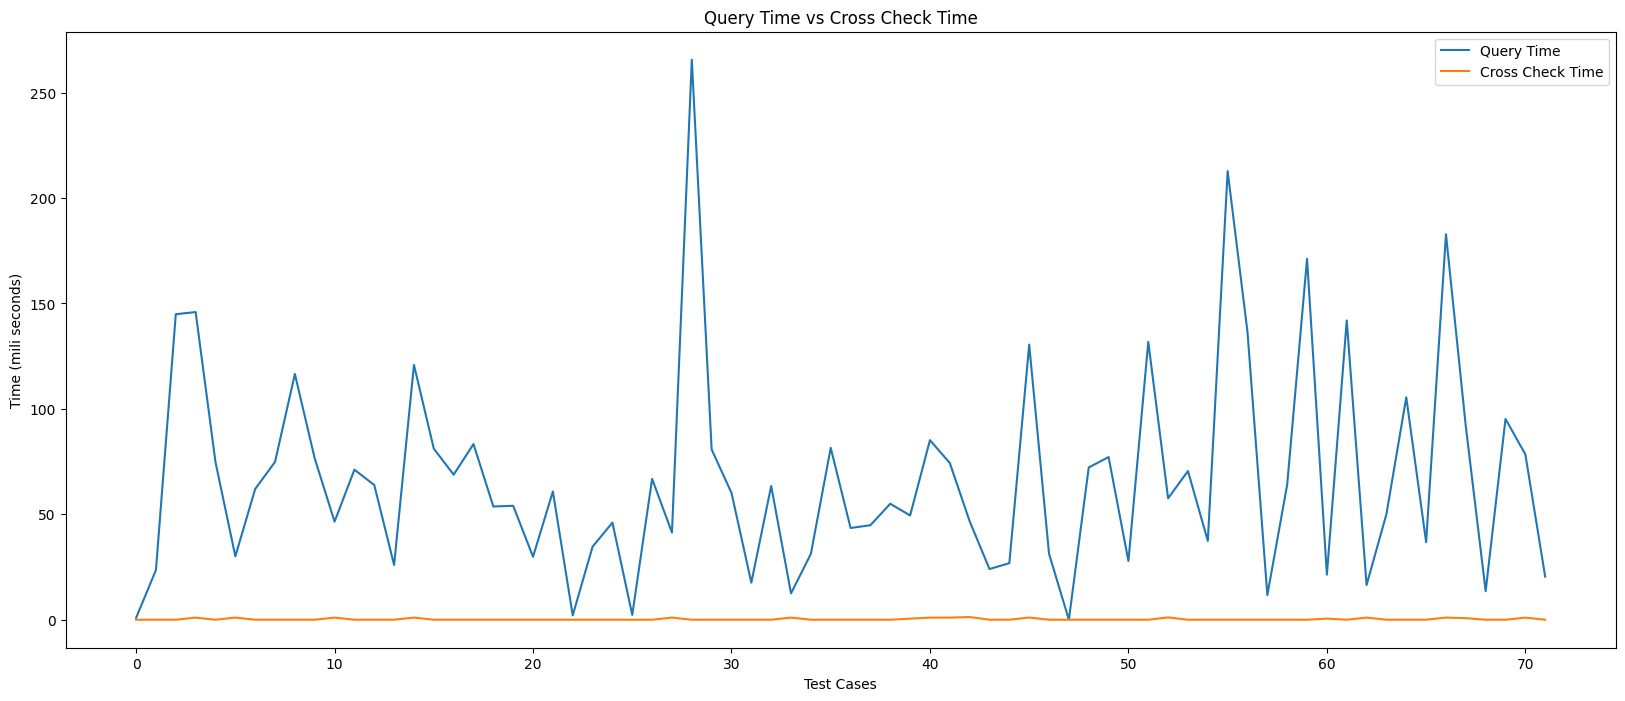

In [93]:
from matplotlib import figure
import matplotlib.pyplot as plt
import numpy as np
print(f"No. of right cases: {right}")
print(f"No. of wrong cases: {wrong}")
print(f"Average query time: {sum(query_times) / len(query_times)} mili seconds")
print(f"Average cross-check time: {sum(cross_check_times) / len(cross_check_times)} mili seconds")

# i want to plot the average query time and cross-check time
x = np.arange(len(query_times))
plt.figure(figsize=(20 , 8))    
plt.plot(x, query_times, label='Query Time')
plt.plot(x, cross_check_times, label='Cross Check Time')
plt.xlabel('Test Cases')
plt.ylabel('Time (mili seconds)')
plt.title('Query Time vs Cross Check Time')
plt.legend()
plt.show()



In [ ]:
import random
import time

f =2

right = 0
wrong = 0

for case in range(1, 10000):
    x = random.randint(0, 50)
    y = random.randint(0, 50)
    print(f"case:{case} ===>")
    if x==y:
        continue
    try:
        print(shortest_paths[(x, y)])
    except KeyError:
        print(f"Shortest path for ({x}, {y}) not found in shortest_paths.")
        continue
            
    # print(shortest_paths[(x, y)])
    path = shortest_paths[(x,y)]
    
    pedges = []
    for i in range(len(path) - 1):
        pedges.append(Edge(path[i], path[i + 1], get_edge_weight(G, path[i], path[i + 1])))
    if len(pedges) < 2:
       continue
    e1 , e2 = random.sample(pedges, 2) 
    
    F3 = [Edge(e1.u, e1.v, get_edge_weight(G, e1.u, e1.v)), Edge(e2.u, e2.v, get_edge_weight(G, e2.u, e2.v))]

    # F3 = [Edge(e1_u, e1_v, get_edge_weight(G, e1_u, e1_v)), Edge(e2_u, e2_v, get_edge_weight(G, e2_u, e2_v))]
    
    
    print(f"avoiding edges:{e1.u, e1.v}, {e2.u, e2.v}")
    start_time = time.time()
    query_output = QUERY2(G , x, y, 3, F3)
    q_weight = sum(get_edge_weight(G, query_output[i], query_output[i + 1]) for i in range(len(query_output) - 1))
    print(f"query output:{query_output} , weight:{q_weight}")
    print("Query time--- %s seconds ---" % (time.time() - start_time))
    start_time = time.time()
    cross_check_output = cross_check2(G, x, y, (e1.u, e1.v), (e2.u, e2.v))
    c_weight = sum(get_edge_weight(G, cross_check_output[i], cross_check_output[i + 1]) for i in range(len(cross_check_output) - 1))
    print(f"cross_check output:{cross_check_output} , weight:{c_weight}")
    print("Cross_check time--- %s seconds ---" % (time.time() - start_time))
    if query_output != cross_check_output:
        wrong += 1
        print("!!!!!!!!!!!!----SOMETHING WENT WRONG-----!!!!!!!!!!!!!!!!!!")
    else :
        right += 1

    print("===================================================")


*Debugging

In [80]:
import matplotlib.pyplot as plt
import numpy as np
print(f"No. of right cases: {right}")
print(f"No. of wrong cases: {wrong}")
print(f"Average query time: {sum(query_times) / len(query_times)} seconds")
print(f"Average cross-check time: {sum(cross_check_times) / len(cross_check_times)} seconds")

# i want to plot the average query time and cross-check time
x = np.arange(len(query_times))
plt.plot(x, query_times, label='Query Time')
plt.plot(x, cross_check_times, label='Cross Check Time')
plt.xlabel('Test Cases')
plt.ylabel('Time (seconds)')
plt.title('Query Time vs Cross Check Time')
plt.legend()
plt.show()



No. of right cases: 7577
No. of wrong cases: 0


NameError: name 'query_times' is not defined